In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline

In [2]:
from classification_model.processing.data_management import load_dataset

In [3]:
train_orig = load_dataset(file_name='AWID-CLS-R-Trn.csv')
test_orig = load_dataset(file_name='AWID-CLS-R-Tst.csv')

In [4]:
from classification_model.processing.feat_eng_categ import one_hot_encoder
ohe = one_hot_encoder(features='class')
ohe.fit(train_orig)
train = ohe.transform(train_orig)
test = ohe.transform(test_orig)

In [5]:
from classification_model.processing.feat_eng_categ import discrete_to_categ, one_hot_encoder, categ_missing_encoder, rare_label_encoder, label_encoder
from classification_model.processing.feat_eng_num import outlier_capping, ArbitraryNumberImputer
from classification_model.processing.feat_creation import feature_creation
from classification_model.processing.feat_selection import remove_constant, remove_quasi_constant, remove_duplicates, selected_drop_features
from sklearn.preprocessing import StandardScaler

In [6]:
eda_pipe = Pipeline([
                ('fc', feature_creation()),
                ('d2c', discrete_to_categ()),
                ('rce', rare_label_encoder(tol=0.001)),
                ('cme', categ_missing_encoder()),
               ])

In [7]:
train = eda_pipe.fit_transform(train_orig)

In [8]:
le = label_encoder()
train_label = le.fit_transform(X=train)

In [9]:
rc  = remove_constant()
rqc = remove_quasi_constant() 
rd  = remove_duplicates()

train_label = rc.fit_transform(train_label)
train_label = rqc.fit_transform(train_label)
train_label = rd.fit_transform(train_label)

In [10]:
columns_to_drop = [col for col in train.columns if col not in train_label.columns ]
train.drop(columns_to_drop, axis=1, inplace=True)

In [19]:
from classification_model.processing.data_management import partition_features
NUMERIC, CATEG = partition_features(train)

In [20]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Feature: frame.time_epoch

count    1.795574e+06
mean     1.870271e+03
std      8.674439e+02
min      0.000000e+00
25%      1.027851e+03
50%      1.902590e+03
75%      2.524301e+03
max      3.599547e+03
Name: frame.time_epoch, dtype: float64
 


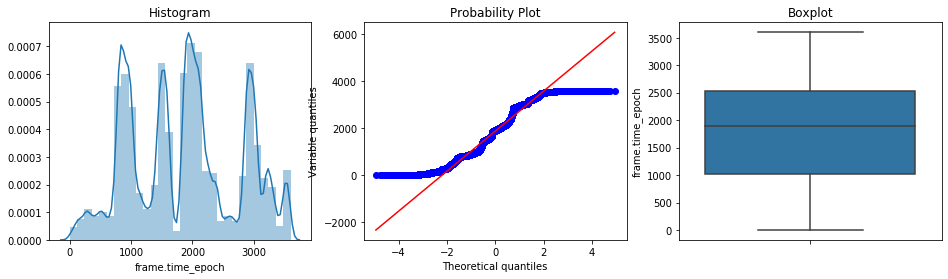

Feature: frame.time_delta

count    1.795574e+06
mean     2.004691e-03
std      6.379538e-03
min      1.000000e-06
25%      3.150000e-04
50%      5.490000e-04
75%      1.113000e-03
max      3.502630e-01
Name: frame.time_delta, dtype: float64
 


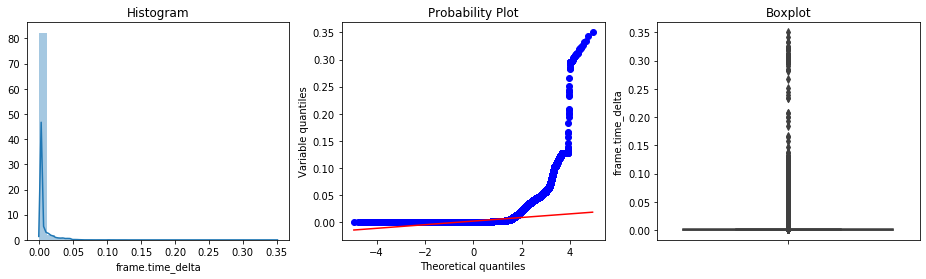

Feature: frame.time_relative

count    1.795574e+06
mean     1.870295e+03
std      8.674439e+02
min      2.427100e-02
25%      1.027876e+03
50%      1.902615e+03
75%      2.524325e+03
max      3.599571e+03
Name: frame.time_relative, dtype: float64
 


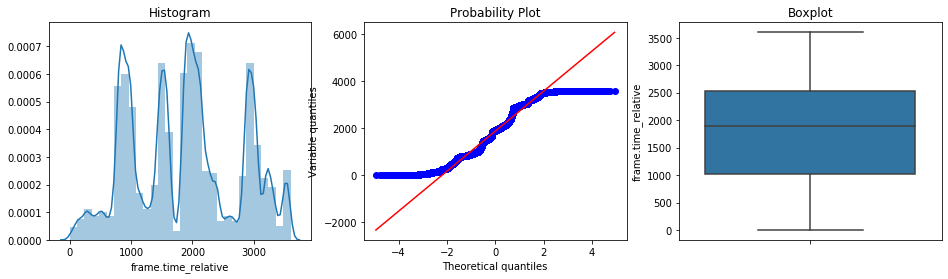

Feature: frame.len

count    1.795574e+06
mean     5.153151e+02
std      6.649246e+02
min      4.000000e+01
25%      4.000000e+01
50%      1.120000e+02
75%      1.552000e+03
max      1.570000e+03
Name: frame.len, dtype: float64
 


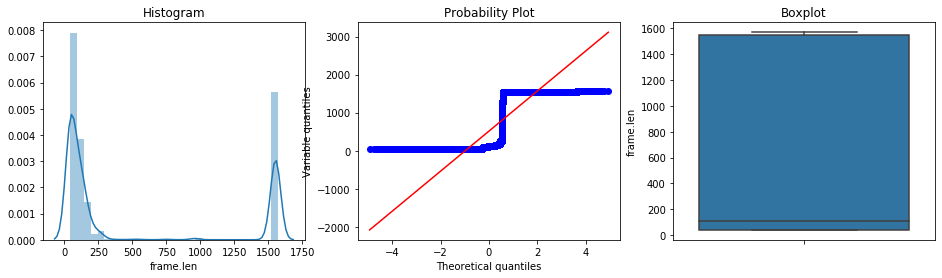

Feature: radiotap.mactime

count    1.794794e+06
mean     3.971911e+09
std      8.673517e+08
min      2.101623e+09
25%      3.129488e+09
50%      4.004209e+09
75%      4.625640e+09
max      5.701134e+09
Name: radiotap.mactime, dtype: float64
 


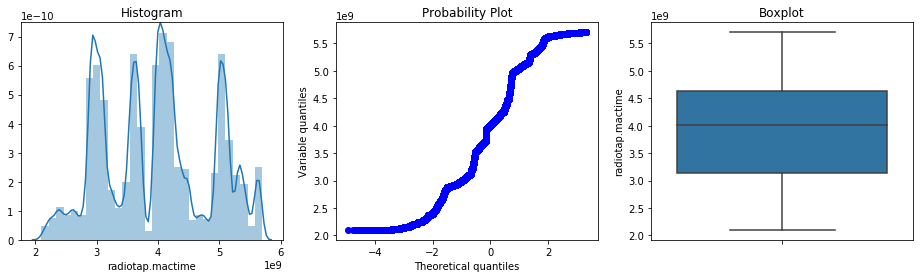

Feature: radiotap.datarate

count    1.795574e+06
mean     2.513951e+01
std      2.373590e+01
min      1.000000e+00
25%      1.000000e+00
50%      2.400000e+01
75%      5.400000e+01
max      5.400000e+01
Name: radiotap.datarate, dtype: float64
 


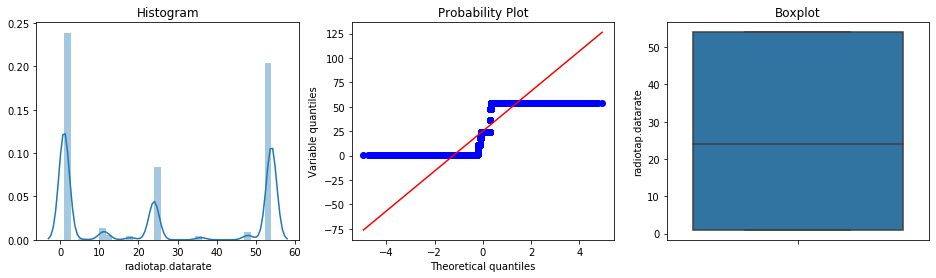

Feature: radiotap.channel.freq

count    1.794794e+06
mean     2.437006e+03
std      6.110732e-01
min      2.412000e+03
25%      2.437000e+03
50%      2.437000e+03
75%      2.437000e+03
max      2.484000e+03
Name: radiotap.channel.freq, dtype: float64
 


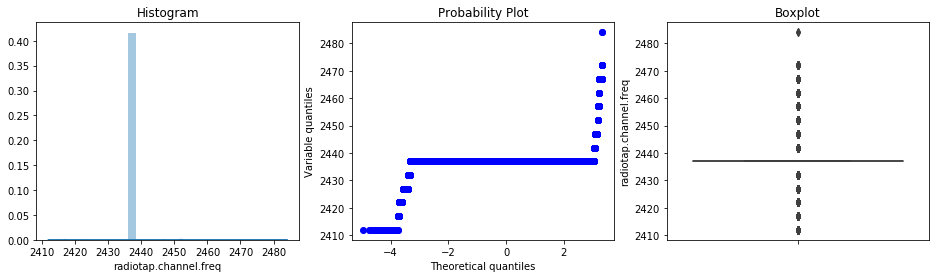

Feature: radiotap.dbm_antsignal

count    1.794794e+06
mean    -2.810740e+01
std      1.022951e+01
min     -7.100000e+01
25%     -3.000000e+01
50%     -2.500000e+01
75%     -2.100000e+01
max     -6.000000e+00
Name: radiotap.dbm_antsignal, dtype: float64
 


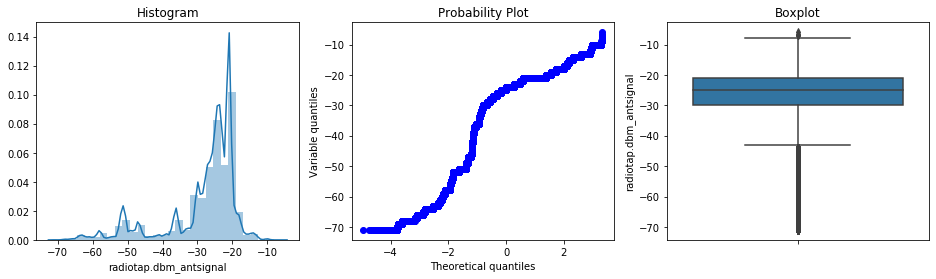

Feature: wlan.fc.subtype

count    1.795574e+06
mean     8.499055e+00
std      4.173016e+00
min      0.000000e+00
25%      8.000000e+00
50%      8.000000e+00
75%      1.200000e+01
max      1.300000e+01
Name: wlan.fc.subtype, dtype: float64
 


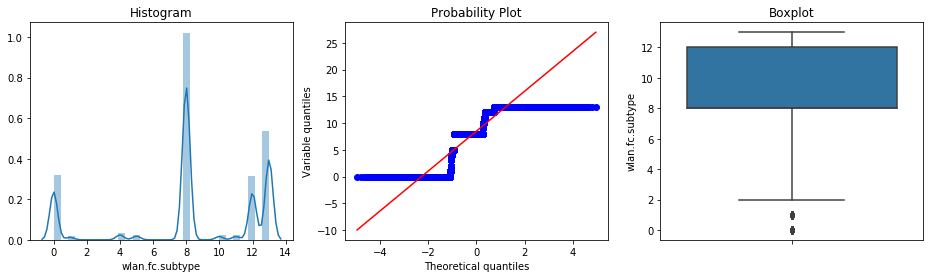

Feature: wlan.duration

count    1.794382e+06
mean     8.402897e+01
std      1.731928e+02
min      0.000000e+00
25%      0.000000e+00
50%      4.400000e+01
75%      4.400000e+01
max      1.450000e+04
Name: wlan.duration, dtype: float64
 


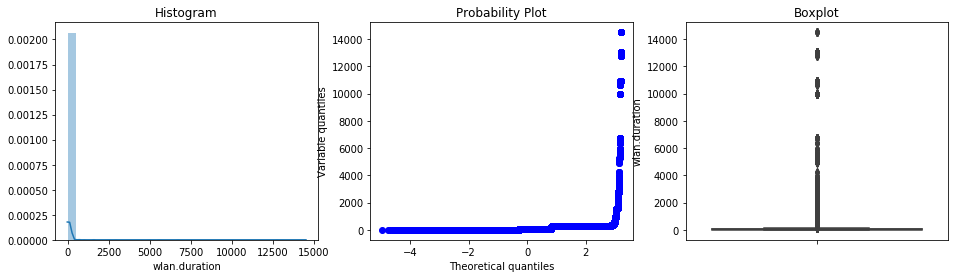

Feature: wlan.frag

count    1.340185e+06
mean     2.164627e-03
std      1.176390e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.200000e+01
Name: wlan.frag, dtype: float64
 


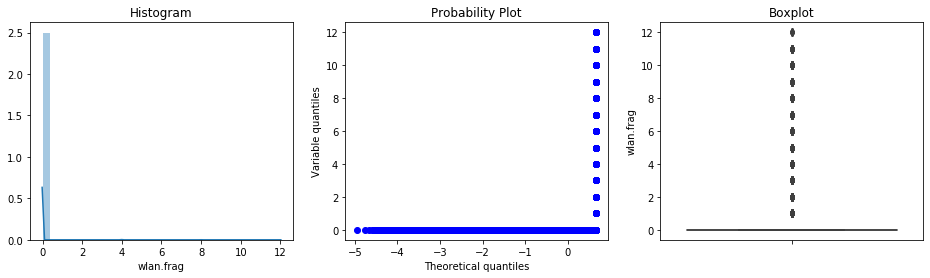

Feature: wlan.seq

count    1.340185e+06
mean     1.910166e+03
std      1.200124e+03
min      0.000000e+00
25%      8.400000e+02
50%      1.811000e+03
75%      2.940000e+03
max      4.095000e+03
Name: wlan.seq, dtype: float64
 


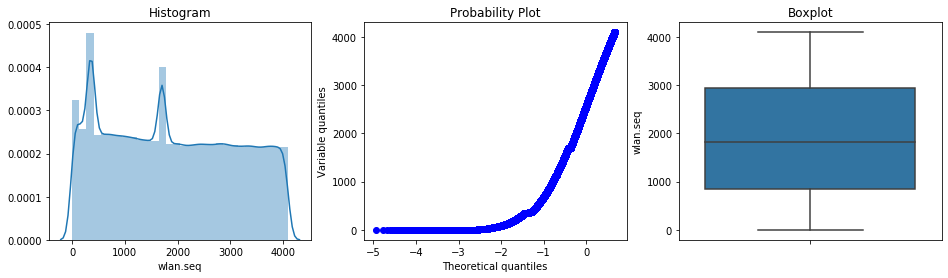

Feature: wlan_mgt.fixed.beacon

count    152092.000000
mean        435.153401
std        3802.135743
min          20.000000
25%         100.000000
50%         100.000000
75%         100.000000
max       65357.000000
Name: wlan_mgt.fixed.beacon, dtype: float64
 


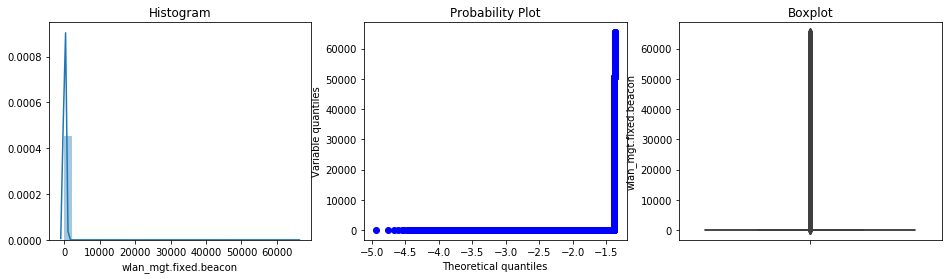

Feature: wlan_mgt.fixed.sequence

count     103.000000
mean      178.699029
std       273.605084
min         0.000000
25%         9.000000
50%       129.000000
75%       253.500000
max      2620.000000
Name: wlan_mgt.fixed.sequence, dtype: float64
 


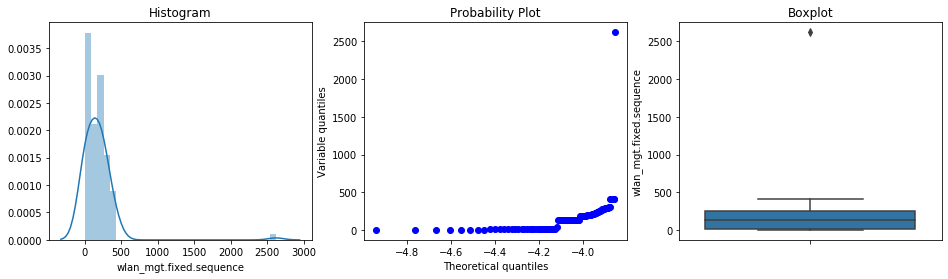

Feature: wlan_mgt.ds.current_channel

count    156851.000000
mean          6.008741
std           0.456351
min           1.000000
25%           6.000000
50%           6.000000
75%           6.000000
max          13.000000
Name: wlan_mgt.ds.current_channel, dtype: float64
 


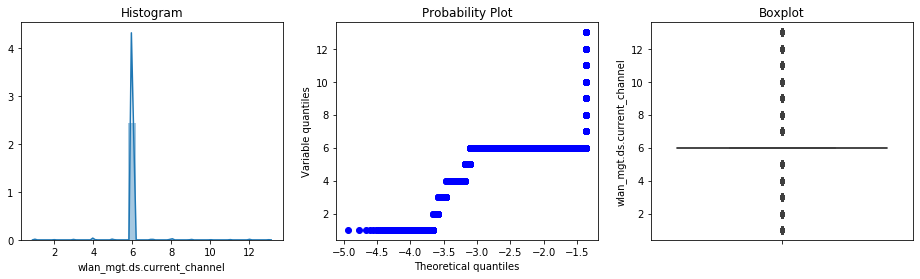

Feature: wlan_mgt.tim.dtim_count

count    129894.000000
mean          0.161593
std           2.061838
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         219.000000
Name: wlan_mgt.tim.dtim_count, dtype: float64
 


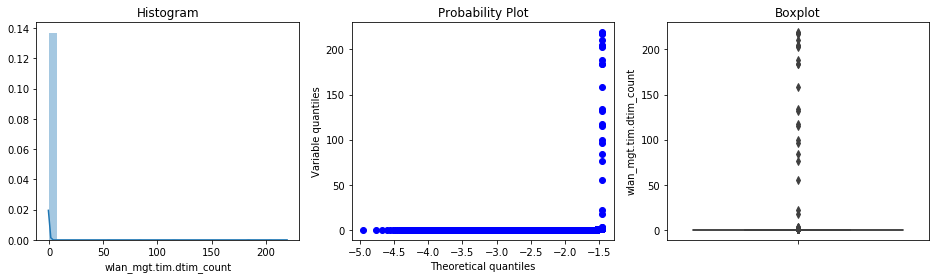

Feature: wlan_mgt.tim.dtim_period

count    129894.000000
mean          1.289474
std           2.296232
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         252.000000
Name: wlan_mgt.tim.dtim_period, dtype: float64
 


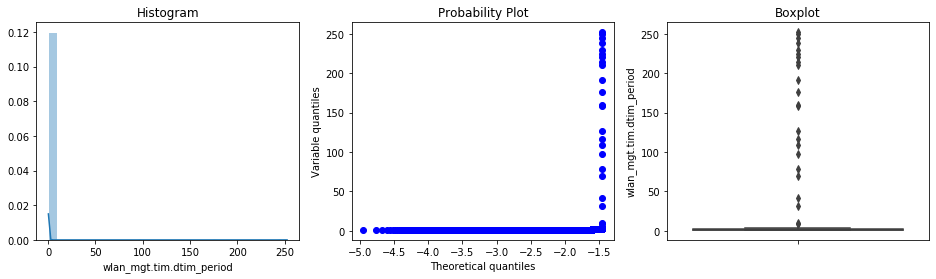

Feature: wlan_mgt.rsn.version

count    76944.000000
mean         9.047788
std        584.911157
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      65138.000000
Name: wlan_mgt.rsn.version, dtype: float64
 


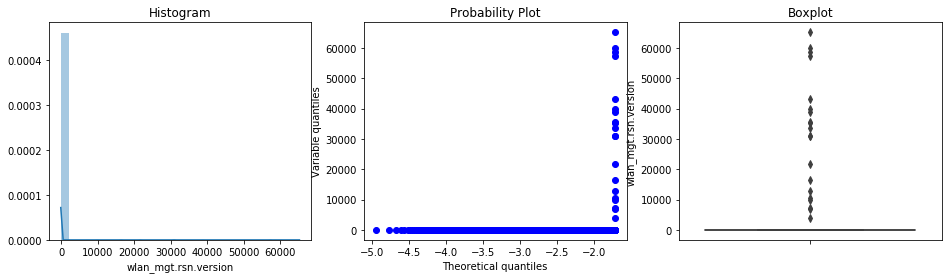

Feature: wlan_mgt.rsn.gcs.type

count    76944.000000
mean         2.032621
std          2.286164
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        255.000000
Name: wlan_mgt.rsn.gcs.type, dtype: float64
 


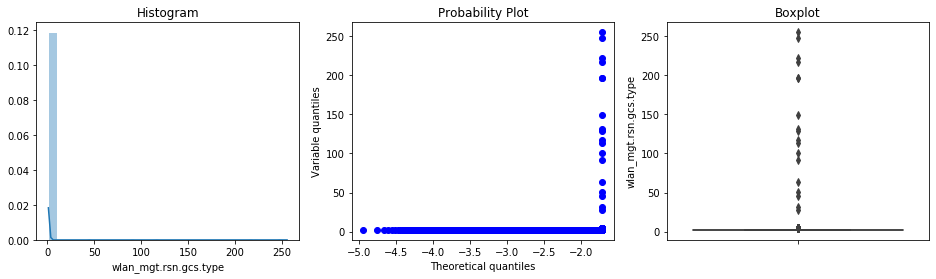

Feature: wlan_mgt.rsn.pcs.count

count    76944.000000
mean        11.678909
std        656.409061
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max      64704.000000
Name: wlan_mgt.rsn.pcs.count, dtype: float64
 


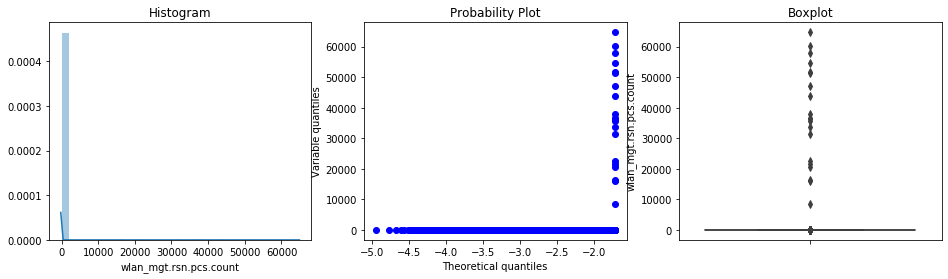

Feature: wlan_mgt.rsn.akms.count

count    76942.000000
mean        10.439097
std        671.834201
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      63111.000000
Name: wlan_mgt.rsn.akms.count, dtype: float64
 


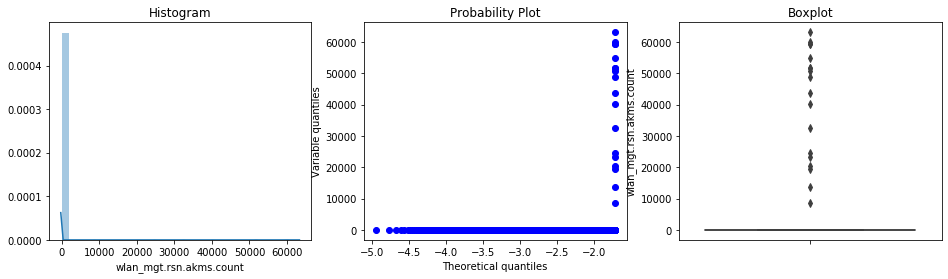

Feature: data.len

count    892554.000000
mean        896.970653
std         700.393956
min           3.000000
25%          60.000000
50%        1488.000000
75%        1490.000000
max        1508.000000
Name: data.len, dtype: float64
 


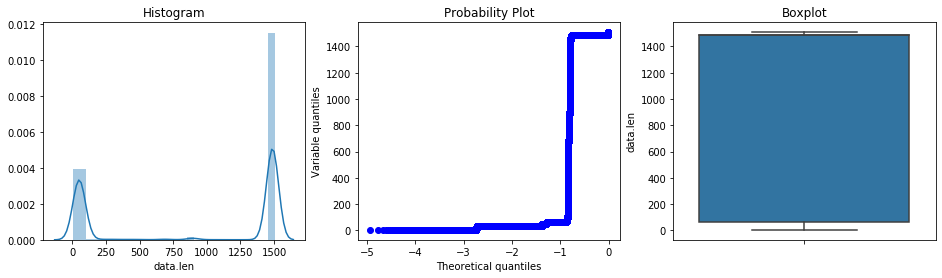

Feature: class_normal

count    1.795574e+06
mean     9.095637e-01
std      2.868058e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: class_normal, dtype: float64
 


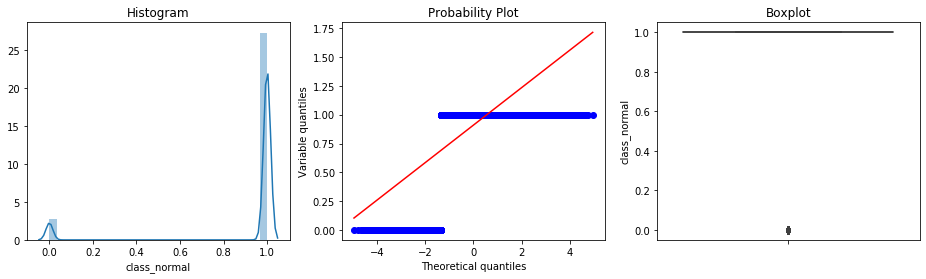

Feature: class_injection

count    1.795574e+06
mean     3.641120e-02
std      1.873111e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: class_injection, dtype: float64
 


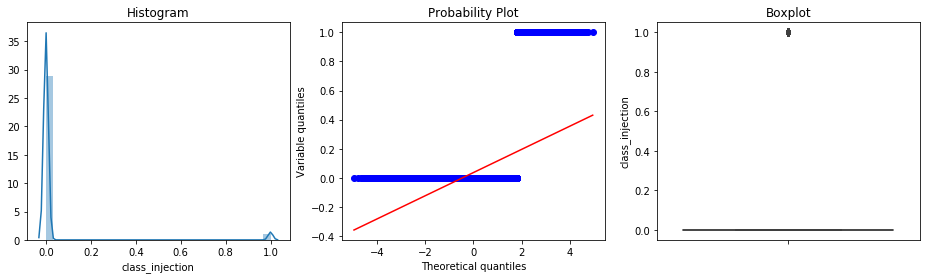

Feature: class_impersonation

count    1.795574e+06
mean     2.702311e-02
std      1.621508e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: class_impersonation, dtype: float64
 


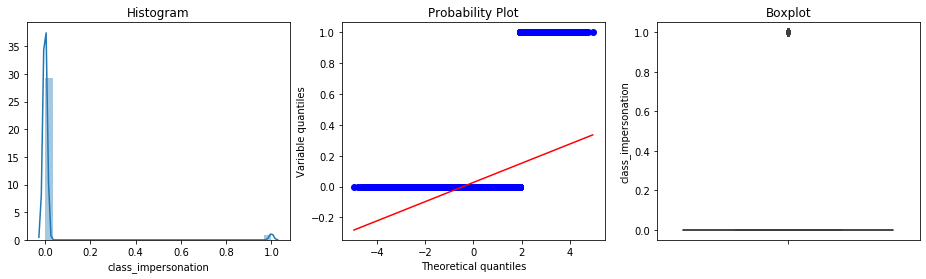

Feature: class_flooding

count    1.795574e+06
mean     2.700195e-02
std      1.620890e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: class_flooding, dtype: float64
 


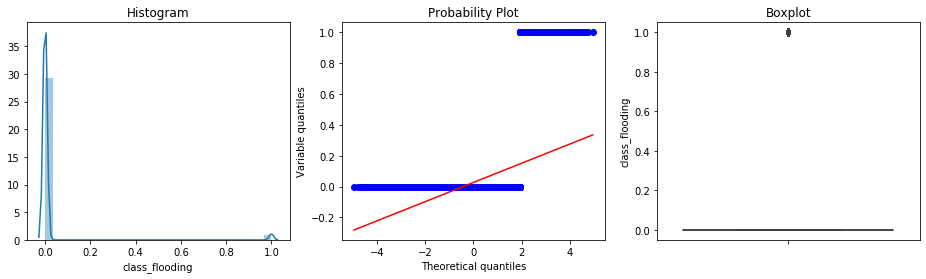

In [21]:
#### Numeric variables ####
for feat in NUMERIC:
    print( 'Feature:',feat)
    print('')
    print(train[feat].describe())
    print(' ')
    diagnostic_plots(train, feat)

In [22]:
for feat in CATEG:
    print( 'Feature:',feat)
    print('')
    print('Number of unique values:')
    print(train[feat].nunique())
    print('')
    print('Value distribution:')
    print((train[feat].value_counts().head(20)))
    print('')
    print('')

Feature: radiotap.length

Number of unique values:
2

Value distribution:
26      1794794
Rare        780
Name: radiotap.length, dtype: int64


Feature: radiotap.channel.type.cck

Number of unique values:
3

Value distribution:
0.0     991973
1.0     802821
Rare       780
Name: radiotap.channel.type.cck, dtype: int64


Feature: wlan.fc.type_subtype

Number of unique values:
14

Value distribution:
0x28    661349
0x1d    416915
0x20    233909
0x0c    206058
0x08    133015
0x1c     35906
0x05     19077
0x24     18564
0x0b     15999
0x0a     15658
0x00     15484
0x01     12973
0x04      6879
Rare      3788
Name: wlan.fc.type_subtype, dtype: int64


Feature: wlan.fc.type

Number of unique values:
3

Value distribution:
2    914814
1    455389
0    425371
Name: wlan.fc.type, dtype: int64


Feature: wlan.fc.ds

Number of unique values:
3

Value distribution:
0x00    880760
0x02    668983
0x01    245831
Name: wlan.fc.ds, dtype: int64


Feature: wlan.fc.frag

Number of unique values:
2

Value 

5

Value distribution:
Rare      1780005
0x0064      11992
0x000a       3495
0x0005         56
0x0001         26
Name: wlan_mgt.fixed.listen_ival, dtype: int64


Feature: wlan_mgt.fixed.current_ap

Number of unique values:
5

Value distribution:
Rare                 1795483
28:c6:8e:86:d3:d6         47
38:22:9d:ae:c5:65         35
b0:48:7a:e2:62:23          7
00:13:33:87:62:6d          2
Name: wlan_mgt.fixed.current_ap, dtype: int64


Feature: wlan_mgt.fixed.status_code

Number of unique values:
3

Value distribution:
Rare      1766628
0x0000      26543
0x000d       2403
Name: wlan_mgt.fixed.status_code, dtype: int64


Feature: wlan_mgt.fixed.timestamp

Number of unique values:
2

Value distribution:
Rare                  1788478
0x0000000000000000       7096
Name: wlan_mgt.fixed.timestamp, dtype: int64


Feature: wlan_mgt.fixed.aid

Number of unique values:
5

Value distribution:
Rare      1782509
0x0001      12981
0x0003         36
0x0004         24
0x0005         24
Name: wlan_mgt.f

In [24]:
def h(content):
    display(HTML(content))
    
def timehist(df, tcol, target, col, target_first, clipping=9999999999999999, concat_df = False, odf = None):
    if concat_df == True:
        df = pd.concat([df, odf])
        
    title = target + ' Hist ' + col
    if( target_first==True):
        df[df[target] == 1].set_index(tcol)[col].clip(0, clipping).plot(style='.', figsize=(15, 3))
        df[df[target] == 0].set_index(tcol)[col].clip(0, clipping).plot(style='.', figsize=(15, 3))
        plt.title(title)
        plt.show()
    elif( target_first==False):
        df[df[target] == 0].set_index(tcol)[col].clip(0, clipping).plot(style='.', title= title, figsize=(15, 3))
        df[df[target] == 1].set_index(tcol)[col].clip(0, clipping).plot(style='.', title= title, figsize=(15, 3))
        plt.title(title)
        plt.show()

In [25]:
def _desc(data, col, label):
    d0 = data.describe().reset_index()
    d0.columns = [col, label]
    return d0.append({col:'unique values', label:data.unique().shape[0]}, ignore_index=True) \
             .append({col:'NaNs', label:data.isnull().sum()}, ignore_index=True) \
             .append({col:'NaNs share', label:np.round(data.isnull().sum() / data.shape[0], 4)}, ignore_index=True) \

def desc(df_train, col, target, include_test=False, df_test=None):
    d0 = _desc(df_train[col], col, 'Train')
    d1 = _desc(df_train.loc[df_train[target] == 1, col], col, 'Train normal')
    d2 = _desc(df_train.loc[df_train[target] == 0, col], col, 'Train not normal')
    if( include_test):
        d3 = _desc(df_test[col], col, 'Test')
        d4 = _desc(df_test.loc[df_test[target] == 1, col], col, 'Test normal')
        d5 = _desc(df_test.loc[df_test[target] == 0, col], col, 'Test not normal')
    if( include_test):
        dd = d0.merge(d1).merge(d2).merge(d3).merge(d4).merge(d5)
    else:
        dd = d0.merge(d1).merge(d2)
    display(dd)
    
    h('<b>Most popular values (NaN = -999):</b>')
    N = 10
    d0 = df_train[[target,col]].groupby(col)[target].agg(['size','mean','sum']).reset_index().sort_values('size', ascending=False).reset_index(drop=True)
    d0 = d0.head(N)
    d0 = d0.rename({'size':'Count in train (desc)','mean':'Mean target train','sum':'Sum target train'}, axis=1)
    display(d0)
        
    d1 = df_test[[target,col]].groupby(col)[target].agg(['size','mean','sum']).reset_index().sort_values('size', ascending=False).reset_index(drop=True)
    d1 = d1.head(N)
    d1 = d1.rename({'size':'Count in test (desc)','mean':'Mean target test','sum':'Sum target test'}, axis=1)
    display(d1)

In [26]:
def hist1(df,col):
    plt.figure(figsize=(15, 3))
    plt.hist(df[col], bins=70);
    plt.title('Train histogram: ' + col);
    plt.show()

In [27]:
def corr1(df,col):
    N = None #10000
    num_vars = [f for f in train.columns if train[f].dtype != 'object']
    trx = df.head(N) if N is not None else df.copy()
    corrs = trx[num_vars].corrwith(trx[col]).reset_index().sort_values(0, ascending=False).reset_index(drop=True).rename({'index':'Column',0:'Correlation with ' + col}, axis=1)
    h('<b>Most correlated values with ' + col + ':</b>')
    trx = pd.concat([corrs.head(6), corrs.dropna().tail(5)])
    def linkx(val):
        return '<a href="#c_{}">{}</a>'.format(val, val)
    trx['Column'] = trx['Column'].apply(linkx)
    h(trx.to_html(escape=False))

In [28]:
def numeric(df_input, tcol_input, target_input, col_input, target_first_input, df_test, include_test):
    timehist(df=df_input, tcol=tcol_input, target=target_input, col=col_input, target_first=target_first_input, odf=df_test, concat_df=include_test)
    hist1(df_input,col_input)
    desc(df_input, col_input, target_input, include_test, df_test)
    corr1(df_input,col_input)

In [29]:
def categorical(df, col, target, df_test, include_test):
    desc(df, col, target, include_test, df_test)

In [30]:
def proc(df, tcol, target, col, target_first, df_test, include_test):
    if col not in ['isFraud','TransactionDT']:
        h('<h3 id="c_' + col + '">' + col + '</h3>' + '<a style="font-size:11px" href="#home">(Jump to top)</a>')
        categorical(df, col, target, df_test, include_test) if train[col].dtype == 'object' else numeric(df, tcol, target, col, target_first, df_test, include_test)

In [31]:
columns = list(train.columns)
for x in ['frame.time_epoch', 'class_normal', 'class_injection', 'class_impersonation', 'class_flooding']:
    columns.remove(x)

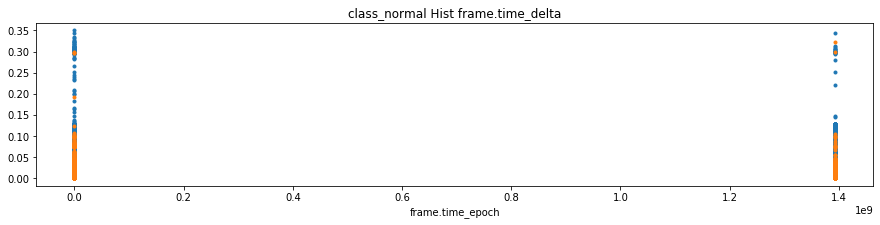

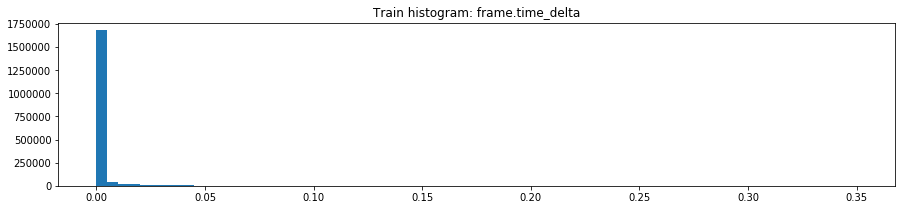

,frame.time_delta,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.795574e+06,1.633189e+06,162385.000000,575642.000000,530784.000000,44858.000000
1,mean,2.004691e-03,2.036714e-03,0.001683,0.002085,0.002087,0.002066
2,std,6.379538e-03,6.630319e-03,0.002788,0.006326,0.006472,0.004227
3,min,1.000000e-06,1.000000e-06,0.000071,0.000001,0.000001,0.000320
4,25%,3.150000e-04,3.100000e-04,0.000986,0.000287,0.000227,0.000832
5,50%,5.490000e-04,4.950000e-04,0.001151,0.000499,0.000452,0.001043
6,75%,1.113000e-03,8.990000e-04,0.002042,0.001096,0.000998,0.001414
7,max,3.502630e-01,3.502630e-01,0.297864,0.344335,0.344335,0.321985
8,unique values,4.360000e+04,4.342600e+04,7016.000000,28358.000000,27874.000000,6065.000000
9,NaNs,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000


,frame.time_delta,Count in train (desc),Mean target train,Sum target train
0,0.000005,30679,1.0,30679
1,0.000004,23346,1.0,23346
2,0.000006,15348,1.0,15348
3,0.000315,13931,1.0,13931
4,0.000312,12071,1.0,12071
5,0.000308,10631,1.0,10631
6,0.000316,8807,1.0,8807
7,0.000311,7798,1.0,7798
8,0.000019,7404,1.0,7404
9,0.000314,7395,1.0,7395


,frame.time_delta,Count in test (desc),Mean target test,Sum target test
0,0.000004,23118,1.0,23118
1,0.000005,19749,1.0,19749
2,0.000006,8295,1.0,8295
3,0.000315,4887,1.0,4887
4,0.000312,4246,1.0,4246
5,0.000308,3469,1.0,3469
6,0.000316,3111,1.0,3111
7,0.000314,2892,1.0,2892
8,0.000311,2670,1.0,2670
9,0.000313,2618,1.0,2618


,Column,Correlation with frame.time_delta
0,frame.time_delta,1.000000
1,radiotap.channel.freq,0.036360
2,wlan_mgt.ds.current_channel,0.029162
3,wlan_mgt.fixed.sequence,0.021332
4,class_normal,0.015919
5,class_impersonation,0.013146
21,wlan.duration,-0.056636
22,frame.len,-0.071888
23,wlan.fc.subtype,-0.072167
24,radiotap.datarate,-0.134765


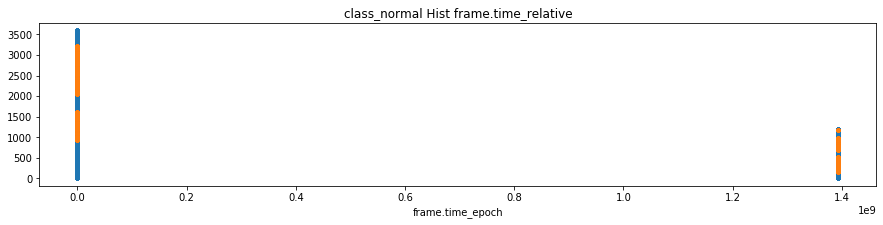

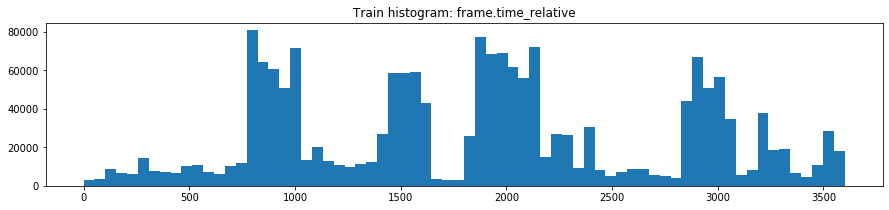

,frame.time_relative,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.795574e+06,1.633189e+06,162385.000000,575642.000000,530784.000000,44858.000000
1,mean,1.870295e+03,1.830303e+03,2272.512558,515.349500,504.419458,644.679636
2,std,8.674439e+02,8.771233e+02,636.209363,400.479795,404.952355,315.628947
3,min,2.427100e-02,2.427100e-02,930.652482,0.001056,0.001056,164.999428
4,25%,1.027876e+03,9.976433e+02,1597.052358,106.320169,98.122032,281.820929
5,50%,1.902615e+03,1.878816e+03,2272.600498,453.484999,419.191977,774.405858
6,75%,2.524325e+03,2.392199e+03,2906.917368,930.050902,923.054840,948.290848
7,max,3.599571e+03,3.599571e+03,3220.645974,1200.289872,1200.289872,1183.890811
8,unique values,1.795574e+06,1.633189e+06,162385.000000,575642.000000,530784.000000,44858.000000
9,NaNs,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000


,frame.time_relative,Count in train (desc),Mean target train,Sum target train
0,0.024271,1,1,1
1,2142.285757,1,1,1
2,2142.292011,1,1,1
3,2142.291579,1,1,1
4,2142.291147,1,1,1
5,2142.291107,1,1,1
6,2142.291021,1,1,1
7,2142.287786,1,1,1
8,2142.287315,1,1,1
9,2142.286868,1,1,1


,frame.time_relative,Count in test (desc),Mean target test,Sum target test
0,0.001056,1,1,1
1,838.191974,1,1,1
2,838.186541,1,1,1
3,838.186545,1,1,1
4,838.186908,1,1,1
5,838.187511,1,1,1
6,838.187516,1,1,1
7,838.189340,1,1,1
8,838.192103,1,1,1
9,838.183844,1,1,1


,Column,Correlation with frame.time_relative
0,frame.time_relative,1.000000
1,frame.time_epoch,1.000000
2,radiotap.mactime,1.000000
3,class_flooding,0.098888
4,class_impersonation,0.078460
5,class_injection,0.070379
21,frame.len,-0.199609
22,radiotap.dbm_antsignal,-0.210761
23,radiotap.datarate,-0.217901
24,wlan.fc.subtype,-0.224889


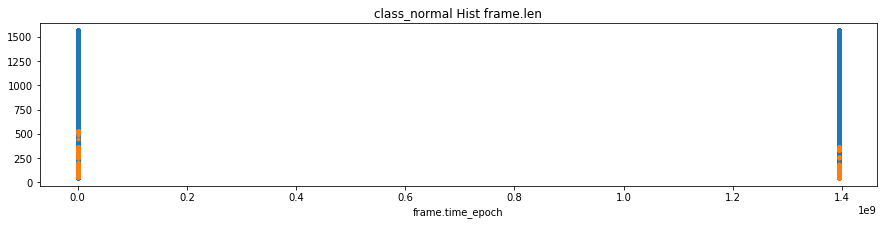

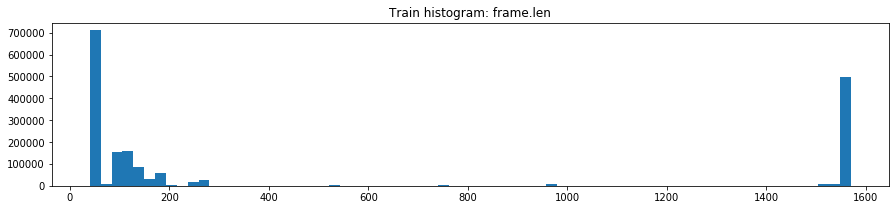

,frame.len,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.795574e+06,1.633189e+06,162385.000000,575642.000000,530784.000000,44858.000000
1,mean,5.153151e+02,5.574003e+02,92.042147,520.097479,557.373964,79.022047
2,std,6.649246e+02,6.828328e+02,49.037970,666.487645,681.075897,24.613905
3,min,4.000000e+01,4.000000e+01,56.000000,40.000000,40.000000,40.000000
4,25%,4.000000e+01,4.000000e+01,56.000000,40.000000,40.000000,66.000000
5,50%,1.120000e+02,1.240000e+02,98.000000,124.000000,124.000000,66.000000
6,75%,1.552000e+03,1.552000e+03,98.000000,1552.000000,1552.000000,98.000000
7,max,1.570000e+03,1.570000e+03,530.000000,1570.000000,1570.000000,362.000000
8,unique values,1.334000e+03,1.329000e+03,66.000000,1212.000000,1209.000000,60.000000
9,NaNs,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000


,frame.len,Count in train (desc),Mean target train,Sum target train
0,40,452821,1.000000,452821
1,1552,265889,1.000000,265889
2,1554,230933,1.000000,230933
3,56,222708,0.813087,181081
4,98,145035,0.245748,35642
5,124,123930,1.000000,123930
6,185,38668,1.000000,38668
7,128,30501,1.000000,30501
8,148,30409,1.000000,30409
9,159,27623,1.000000,27623


,frame.len,Count in test (desc),Mean target test,Sum target test
0,40,185920,0.990539,184161
1,1552,98328,1.000000,98328
2,124,39058,0.999283,39030
3,1560,30586,1.000000,30586
4,98,30029,0.542342,16286
5,1554,27915,1.000000,27915
6,66,18606,0.000000,0
7,118,17920,0.994754,17826
8,185,14972,1.000000,14972
9,128,13217,0.993493,13131


,Column,Correlation with frame.len
0,frame.len,1.000000
1,data.len,0.999999
2,radiotap.datarate,0.755426
3,wlan_mgt.fixed.beacon,0.536958
4,radiotap.dbm_antsignal,0.350015
5,wlan_mgt.rsn.pcs.count,0.276325
21,wlan.duration,-0.150778
22,wlan.fc.subtype,-0.182199
23,frame.time_relative,-0.199609
24,frame.time_epoch,-0.199609


,radiotap.length,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574.0,1633189.0,162385.0,575642.0,530784.0,44858.0
1,unique values,2.0,2.0,1.0,2.0,2.0,1.0
2,NaNs,0.0,0.0,0.0,0.0,0.0,0.0
3,NaNs share,0.0,0.0,0.0,0.0,0.0,0.0


,radiotap.length,Count in train (desc),Mean target train,Sum target train
0,26,1794794,0.909524,1632409
1,Rare,780,1.000000,780


,radiotap.length,Count in test (desc),Mean target test,Sum target test
0,26,575382,0.922038,530524
1,13,260,1.000000,260


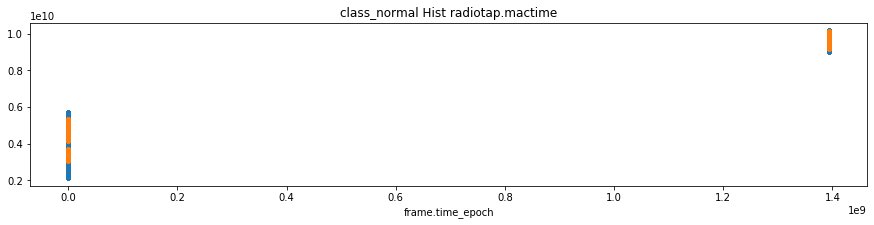

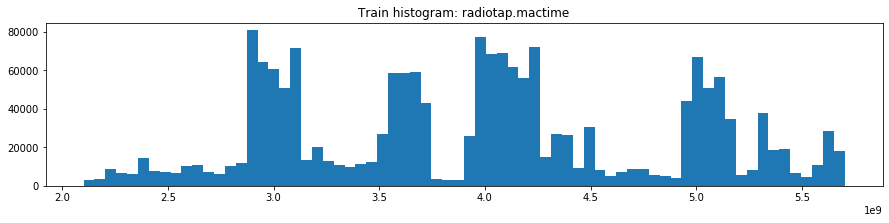

,radiotap.mactime,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.794794e+06,1.632409e+06,1.623850e+05,5.753820e+05,5.305240e+05,4.485800e+04
1,mean,3.971911e+09,3.931904e+09,4.374089e+09,9.503225e+09,9.492286e+09,9.632594e+09
2,std,8.673517e+08,8.770296e+08,6.362031e+08,4.004943e+08,4.049690e+08,3.156259e+08
3,min,2.101623e+09,2.101623e+09,3.032243e+09,8.987922e+09,8.987922e+09,9.152918e+09
4,25%,3.129488e+09,3.099244e+09,3.698636e+09,9.094203e+09,9.086025e+09,9.269738e+09
5,50%,4.004209e+09,3.980408e+09,4.374177e+09,9.441011e+09,9.406661e+09,9.762318e+09
6,75%,4.625640e+09,4.493705e+09,5.008488e+09,9.917962e+09,9.910966e+09,9.936202e+09
7,max,5.701134e+09,5.701134e+09,5.322213e+09,1.018820e+10,1.018820e+10,1.017180e+10
8,unique values,1.794795e+06,1.632410e+06,1.623850e+05,5.753830e+05,5.305250e+05,4.485800e+04
9,NaNs,7.800000e+02,7.800000e+02,0.000000e+00,2.600000e+02,2.600000e+02,0.000000e+00


,radiotap.mactime,Count in train (desc),Mean target train,Sum target train
0,2.101623e+09,1,1,1
1,4.243829e+09,1,1,1
2,4.243835e+09,1,1,1
3,4.243835e+09,1,1,1
4,4.243834e+09,1,1,1
5,4.243834e+09,1,1,1
6,4.243833e+09,1,1,1
7,4.243832e+09,1,1,1
8,4.243832e+09,1,1,1
9,4.243831e+09,1,1,1


,radiotap.mactime,Count in test (desc),Mean target test,Sum target test
0,8.987922e+09,1,1,1
1,9.826108e+09,1,1,1
2,9.826106e+09,1,1,1
3,9.826106e+09,1,1,1
4,9.826106e+09,1,1,1
5,9.826106e+09,1,1,1
6,9.826107e+09,1,1,1
7,9.826107e+09,1,1,1
8,9.826108e+09,1,1,1
9,9.826105e+09,1,1,1


,Column,Correlation with radiotap.mactime
0,radiotap.mactime,1.000000
1,frame.time_relative,1.000000
2,frame.time_epoch,1.000000
3,class_flooding,0.098912
4,class_impersonation,0.078478
5,class_injection,0.070393
21,frame.len,-0.199720
22,radiotap.dbm_antsignal,-0.210761
23,radiotap.datarate,-0.218059
24,wlan.fc.subtype,-0.225060


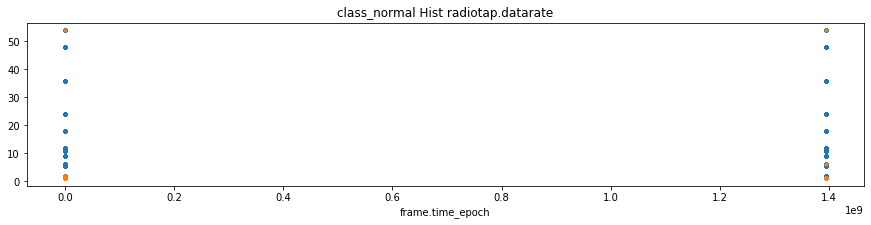

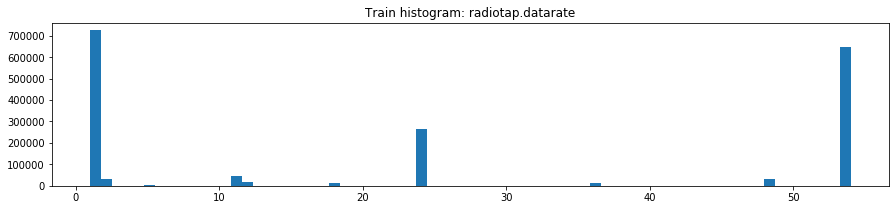

,radiotap.datarate,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.795574e+06,1.633189e+06,162385.000000,575642.000000,530784.000000,44858.000000
1,mean,2.513951e+01,2.753963e+01,1.000345,25.369171,27.428567,1.001293
2,std,2.373590e+01,2.357352e+01,0.131594,21.570751,21.217711,0.251350
3,min,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000
4,25%,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000
5,50%,2.400000e+01,2.400000e+01,1.000000,24.000000,24.000000,1.000000
6,75%,5.400000e+01,5.400000e+01,1.000000,54.000000,54.000000,1.000000
7,max,5.400000e+01,5.400000e+01,54.000000,54.000000,54.000000,54.000000
8,unique values,1.200000e+01,1.200000e+01,3.000000,12.000000,12.000000,3.000000
9,NaNs,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000


,radiotap.datarate,Count in train (desc),Mean target train,Sum target train
0,1.0,724033,0.775727,561652
1,54.0,648415,0.999998,648414
2,24.0,266381,1.000000,266381
3,11.0,43882,1.000000,43882
4,2.0,33956,0.999912,33953
5,48.0,30251,1.000000,30251
6,12.0,16182,1.000000,16182
7,36.0,14859,1.000000,14859
8,18.0,14245,1.000000,14245
9,5.5,1730,1.000000,1730


,radiotap.datarate,Count in test (desc),Mean target test,Sum target test
0,1.0,184682,0.757118,139826
1,54.0,167412,0.999994,167411
2,24.0,133667,1.000000,133667
3,36.0,18282,1.000000,18282
4,11.0,17539,1.000000,17539
5,48.0,17217,1.000000,17217
6,12.0,16594,1.000000,16594
7,18.0,15574,1.000000,15574
8,2.0,3630,1.000000,3630
9,5.5,473,1.000000,473


,Column,Correlation with radiotap.datarate
0,radiotap.datarate,1.000000
1,frame.len,0.755426
2,data.len,0.636754
3,radiotap.dbm_antsignal,0.547501
4,class_normal,0.320680
5,wlan.seq,0.070914
15,frame.time_relative,-0.217901
16,frame.time_epoch,-0.217901
17,radiotap.mactime,-0.218059
18,wlan_mgt.fixed.sequence,-0.240437


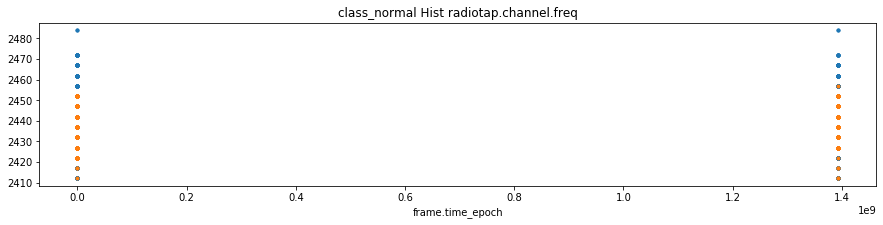

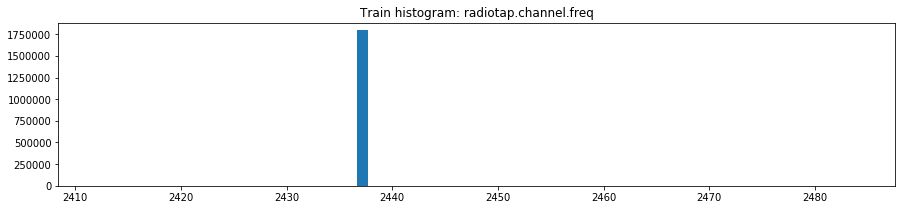

,radiotap.channel.freq,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.794794e+06,1.632409e+06,162385.000000,575382.000000,530524.000000,44858.000000
1,mean,2.437006e+03,2.437007e+03,2436.997814,2437.006907,2437.007953,2436.994538
2,std,6.110732e-01,6.196340e-01,0.517124,0.681065,0.680894,0.682973
3,min,2.412000e+03,2.412000e+03,2412.000000,2412.000000,2412.000000,2412.000000
4,25%,2.437000e+03,2.437000e+03,2437.000000,2437.000000,2437.000000,2437.000000
5,50%,2.437000e+03,2.437000e+03,2437.000000,2437.000000,2437.000000,2437.000000
6,75%,2.437000e+03,2.437000e+03,2437.000000,2437.000000,2437.000000,2437.000000
7,max,2.484000e+03,2.484000e+03,2452.000000,2484.000000,2484.000000,2457.000000
8,unique values,1.500000e+01,1.500000e+01,9.000000,15.000000,15.000000,10.000000
9,NaNs,7.800000e+02,7.800000e+02,0.000000,260.000000,260.000000,0.000000


,radiotap.channel.freq,Count in train (desc),Mean target train,Sum target train
0,2437.0,1792714,0.909638,1630720
1,2447.0,499,0.749499,374
2,2467.0,369,1.000000,369
3,2427.0,336,0.598214,201
4,2432.0,178,0.898876,160
5,2442.0,166,0.722892,120
6,2412.0,152,0.993421,151
7,2422.0,114,0.622807,71
8,2457.0,98,1.000000,98
9,2452.0,71,0.704225,50


,radiotap.channel.freq,Count in test (desc),Mean target test,Sum target test
0,2437.0,574499,0.922256,529835
1,2447.0,197,0.720812,142
2,2427.0,194,0.530928,103
3,2467.0,134,1.000000,134
4,2442.0,75,0.800000,60
5,2412.0,59,0.966102,57
6,2432.0,57,0.754386,43
7,2422.0,50,0.980000,49
8,2457.0,50,0.980000,49
9,2452.0,28,0.535714,15


,Column,Correlation with radiotap.channel.freq
0,radiotap.channel.freq,1.000000
1,wlan_mgt.fixed.sequence,0.887801
2,wlan_mgt.ds.current_channel,0.615228
3,frame.time_delta,0.036360
4,wlan.duration,0.005247
5,data.len,0.004943
21,class_impersonation,-0.002871
22,wlan_mgt.rsn.gcs.type,-0.007806
23,wlan.fc.subtype,-0.009411
24,radiotap.datarate,-0.011209


,radiotap.channel.type.cck,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574.0,1633189.0,162385.0,575382.0000,530524.0000,44858.0
1,unique values,3.0,3.0,2.0,3.0000,3.0000,2.0
2,NaNs,0.0,0.0,0.0,260.0000,260.0000,0.0
3,NaNs share,0.0,0.0,0.0,0.0005,0.0005,0.0


,radiotap.channel.type.cck,Count in train (desc),Mean target train,Sum target train
0,0,991973,0.999999,991972
1,1,802821,0.797733,640437
2,Rare,780,1.000000,780


,radiotap.channel.type.cck,Count in test (desc),Mean target test,Sum target test
0,0.0,369318,0.999995,369316
1,1.0,206064,0.782320,161208


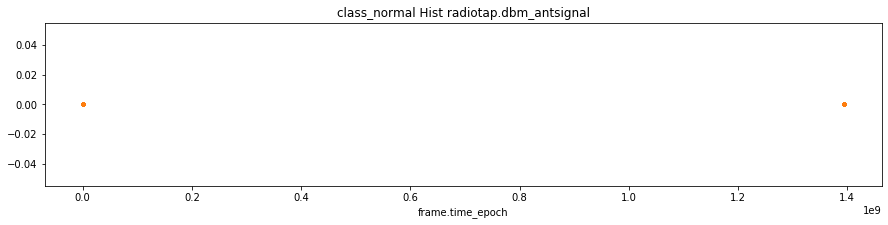

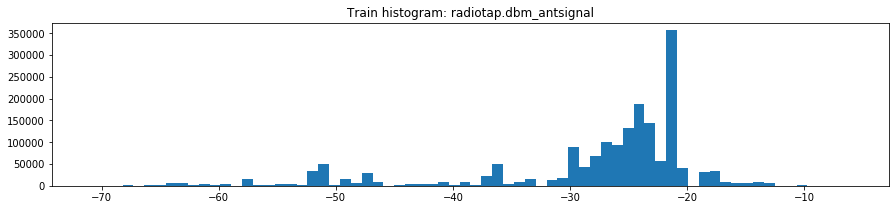

,radiotap.dbm_antsignal,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.794794e+06,1.632409e+06,162385.000000,575382.000000,530524.000000,44858.000000
1,mean,-2.810740e+01,-2.819522e+01,-27.224565,-28.775248,-29.075228,-25.227473
2,std,1.022951e+01,1.052849e+01,6.434069,9.238030,9.482436,4.192694
3,min,-7.100000e+01,-7.100000e+01,-71.000000,-78.000000,-78.000000,-72.000000
4,25%,-3.000000e+01,-3.000000e+01,-28.000000,-33.000000,-34.000000,-26.000000
5,50%,-2.500000e+01,-2.400000e+01,-25.000000,-25.000000,-26.000000,-24.000000
6,75%,-2.100000e+01,-2.100000e+01,-25.000000,-23.000000,-23.000000,-23.000000
7,max,-6.000000e+00,-6.000000e+00,-16.000000,-9.000000,-9.000000,-18.000000
8,unique values,6.700000e+01,6.700000e+01,53.000000,71.000000,71.000000,47.000000
9,NaNs,7.800000e+02,7.800000e+02,0.000000,260.000000,260.000000,0.000000


,radiotap.dbm_antsignal,Count in train (desc),Mean target train,Sum target train
0,-21.0,356062,0.997837,355292
1,-24.0,188040,0.939412,176647
2,-23.0,143737,0.982308,141194
3,-25.0,133328,0.559342,74576
4,-27.0,100008,0.907817,90789
5,-26.0,93958,0.786192,73869
6,-30.0,88537,0.915967,81097
7,-28.0,67777,0.962421,65230
8,-22.0,56531,0.731935,41377
9,-51.0,50587,0.999743,50574


,radiotap.dbm_antsignal,Count in test (desc),Mean target test,Sum target test
0,-24.0,93347,0.825565,77064
1,-21.0,63450,0.994957,63130
2,-23.0,41110,0.947142,38937
3,-25.0,40521,0.904741,36661
4,-36.0,39946,0.992865,39661
5,-31.0,35135,0.995019,34960
6,-30.0,27832,0.896055,24939
7,-27.0,21042,0.921158,19383
8,-26.0,20711,0.901405,18669
9,-28.0,18016,0.951987,17151


,Column,Correlation with radiotap.dbm_antsignal
0,radiotap.dbm_antsignal,1.000000
1,radiotap.datarate,0.547501
2,frame.len,0.350015
3,data.len,0.341172
4,wlan_mgt.fixed.beacon,0.141915
5,wlan_mgt.tim.dtim_period,0.112078
21,frame.time_delta,-0.207914
22,radiotap.mactime,-0.210761
23,frame.time_epoch,-0.210761
24,frame.time_relative,-0.210761


,wlan.fc.type_subtype,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,575642,530784,44858
1,unique,14,14,8,19,19,12
2,top,0x28,0x28,0x20,0x28,0x28,0x20
3,freq,661349,661349,110110,187804,187803,35287
4,unique values,14,14,8,19,19,12
5,NaNs,0,0,0,0,0,0
6,NaNs share,0,0,0,0,0,0


,wlan.fc.type_subtype,Count in train (desc),Mean target train,Sum target train
0,0x28,661349,1.000000,661349
1,0x1d,416915,1.000000,416915
2,0x20,233909,0.529261,123799
3,0x0c,206058,0.873812,180056
4,0x08,133015,0.962846,128073
5,0x1c,35906,1.000000,35906
6,0x05,19077,0.887194,16925
7,0x24,18564,1.000000,18564
8,0x0b,15999,0.974561,15592
9,0x0a,15658,0.002108,33


,wlan.fc.type_subtype,Count in test (desc),Mean target test,Sum target test
0,0x28,187804,0.999995,187803
1,0x1d,183656,1.000000,183656
2,0x20,126862,0.721847,91575
3,0x08,52972,0.964547,51094
4,0x05,6937,0.972899,6749
5,0x0c,5963,0.214825,1281
6,0x24,5340,0.969101,5175
7,0x04,2690,0.862825,2321
8,0x1c,2264,0.223057,505
9,0x0a,326,0.006135,2


,wlan.fc.type,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574.0,1633189.0,162385.0,575642.0,530784.0,44858.0
1,unique values,3.0,3.0,2.0,3.0,3.0,3.0
2,NaNs,0.0,0.0,0.0,0.0,0.0,0.0
3,NaNs share,0.0,0.0,0.0,0.0,0.0,0.0


,wlan.fc.type,Count in train (desc),Mean target train,Sum target train
0,2,914814,0.879637,804704
1,1,455389,1.000000,455389
2,0,425371,0.877107,373096


,wlan.fc.type,Count in test (desc),Mean target test,Sum target test
0,2,320097,0.889243,284644
1,1,186198,0.989484,184240
2,0,69347,0.892613,61900


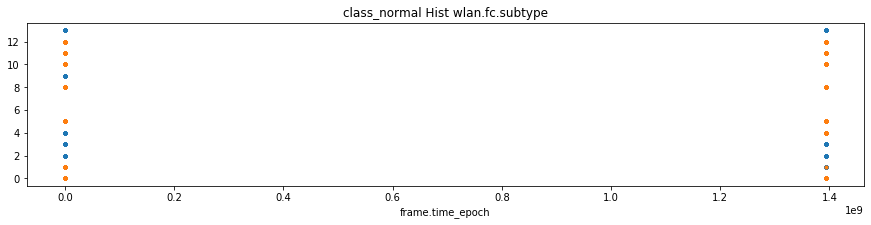

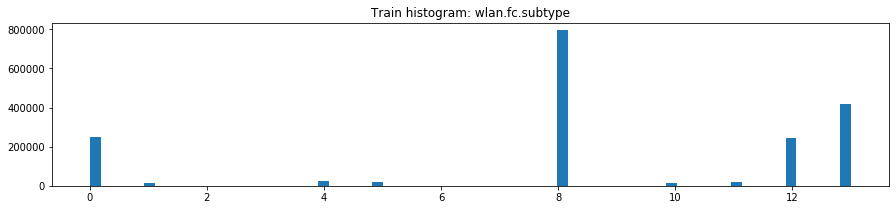

,wlan.fc.subtype,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.795574e+06,1.633189e+06,162385.000000,575642.000000,530784.000000,44858.000000
1,mean,8.499055e+00,9.023831e+00,3.221116,7.800107,8.269247,2.248986
2,std,4.173016e+00,3.691329e+00,4.988716,4.756858,4.476231,4.457306
3,min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,25%,8.000000e+00,8.000000e+00,0.000000,8.000000,8.000000,0.000000
5,50%,8.000000e+00,8.000000e+00,0.000000,8.000000,8.000000,0.000000
6,75%,1.200000e+01,1.300000e+01,10.000000,13.000000,13.000000,0.000000
7,max,1.300000e+01,1.300000e+01,12.000000,13.000000,13.000000,12.000000
8,unique values,1.200000e+01,1.200000e+01,7.000000,11.000000,11.000000,8.000000
9,NaNs,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000


,wlan.fc.subtype,Count in train (desc),Mean target train,Sum target train
0,8,794387,0.993779,789445
1,13,416943,1.000000,416943
2,0,249393,0.545926,136150
3,12,242956,0.892977,216954
4,4,25443,1.000000,25443
5,5,19077,0.887194,16925
6,11,17274,0.976439,16867
7,10,16850,0.072700,1225
8,1,12973,0.998921,12959
9,3,109,1.000000,109


,wlan.fc.subtype,Count in test (desc),Mean target test,Sum target test
0,8,240776,0.992196,238897
1,13,183659,1.000000,183659
2,0,126911,0.721955,91624
3,12,8318,0.225655,1877
4,4,8030,0.933499,7496
5,5,6937,0.972899,6749
6,11,504,0.595238,300
7,10,393,0.175573,69
8,1,60,0.983333,59
9,3,31,1.000000,31


,Column,Correlation with wlan.fc.subtype
0,wlan.fc.subtype,1.000000
1,data.len,0.570980
2,class_normal,0.398813
3,wlan.seq,0.085297
4,class_flooding,0.067866
5,radiotap.dbm_antsignal,0.060383
21,wlan_mgt.fixed.beacon,-0.232762
22,class_impersonation,-0.315907
23,class_injection,-0.395906
24,wlan_mgt.tim.dtim_period,-0.846356


,wlan.fc.ds,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,575642,530784,44858
1,unique,3,3,3,3,3,3
2,top,0x00,0x00,0x01,0x00,0x00,0x02
3,freq,880760,828485,65383,255545,246140,18606
4,unique values,3,3,3,3,3,3
5,NaNs,0,0,0,0,0,0
6,NaNs share,0,0,0,0,0,0


,wlan.fc.ds,Count in train (desc),Mean target train,Sum target train
0,0x00,880760,0.940648,828485
1,0x02,668983,0.933142,624256
2,0x01,245831,0.734033,180448


,wlan.fc.ds,Count in test (desc),Mean target test,Sum target test
0,0x00,255545,0.963196,246140
1,0x02,237052,0.921511,218446
2,0x01,83045,0.797134,66198


,wlan.fc.frag,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574.0,1633189.0,162385.0,575642.0,530784.0,44858.0
1,unique values,2.0,1.0,2.0,2.0,2.0,2.0
2,NaNs,0.0,0.0,0.0,0.0,0.0,0.0
3,NaNs share,0.0,0.0,0.0,0.0,0.0,0.0


,wlan.fc.frag,Count in train (desc),Mean target train,Sum target train
0,0,1794901,0.909905,1633189
1,Rare,673,0.000000,0


,wlan.fc.frag,Count in test (desc),Mean target test,Sum target test
0,0,556557,0.953083,530445
1,1,19085,0.017763,339


,wlan.fc.retry,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574.0,1633189.0,162385.0,575642.0,530784.0,44858.0
1,unique values,2.0,2.0,2.0,2.0,2.0,2.0
2,NaNs,0.0,0.0,0.0,0.0,0.0,0.0
3,NaNs share,0.0,0.0,0.0,0.0,0.0,0.0


,wlan.fc.retry,Count in train (desc),Mean target train,Sum target train
0,0,1567342,0.896395,1404958
1,1,228232,0.999996,228231


,wlan.fc.retry,Count in test (desc),Mean target test,Sum target test
0,0,537295,0.916554,492460
1,1,38347,0.999400,38324


,wlan.fc.pwrmgt,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574.0,1633189.0,162385.0,575642.0,530784.0,44858.0
1,unique values,2.0,2.0,2.0,2.0,2.0,2.0
2,NaNs,0.0,0.0,0.0,0.0,0.0,0.0
3,NaNs share,0.0,0.0,0.0,0.0,0.0,0.0


,wlan.fc.pwrmgt,Count in train (desc),Mean target train,Sum target train
0,0,1753823,0.926126,1624261
1,1,41751,0.213839,8928


,wlan.fc.pwrmgt,Count in test (desc),Mean target test,Sum target test
0,0,572439,0.921938,527753
1,1,3203,0.946300,3031


,wlan.fc.moredata,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574.0,1633189.0,162385.0,575642.0,530784.0,44858.0
1,unique values,2.0,2.0,2.0,2.0,2.0,1.0
2,NaNs,0.0,0.0,0.0,0.0,0.0,0.0
3,NaNs share,0.0,0.0,0.0,0.0,0.0,0.0


,wlan.fc.moredata,Count in train (desc),Mean target train,Sum target train
0,0,1792391,0.909405,1630010
1,1,3183,0.998743,3179


,wlan.fc.moredata,Count in test (desc),Mean target test,Sum target test
0,0,572847,0.921693,527989
1,1,2795,1.000000,2795


,wlan.fc.protected,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574.0,1633189.0,162385.0,575642.0,530784.0,44858.0
1,unique values,2.0,2.0,2.0,2.0,2.0,2.0
2,NaNs,0.0,0.0,0.0,0.0,0.0,0.0
3,NaNs share,0.0,0.0,0.0,0.0,0.0,0.0


,wlan.fc.protected,Count in train (desc),Mean target train,Sum target train
0,0,909830,0.942544,857555
1,1,885744,0.875686,775634


,wlan.fc.protected,Count in test (desc),Mean target test,Sum target test
0,1,313247,0.887348,277959
1,0,262395,0.963528,252825


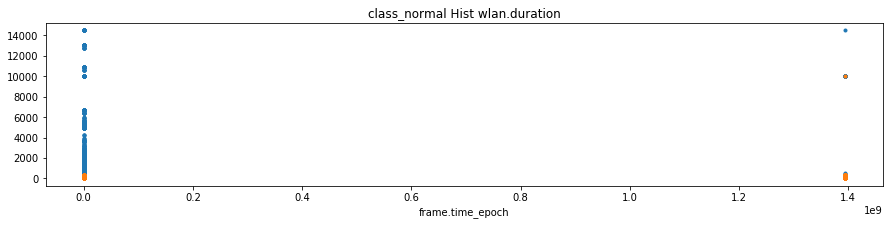

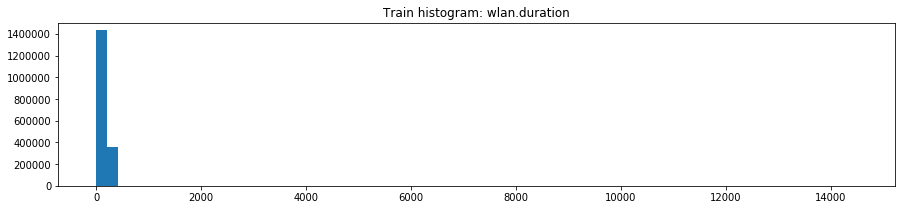

,wlan.duration,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.794382e+06,1.631997e+06,162385.000000,575575.000000,530717.000000,44858.000000
1,mean,8.402897e+01,7.458605e+01,178.931958,50.370706,32.694477,259.498952
2,std,1.731928e+02,1.720184e+02,155.459956,119.506437,100.508614,127.680545
3,min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,314.000000
5,50%,4.400000e+01,4.400000e+01,314.000000,44.000000,0.000000,314.000000
6,75%,4.400000e+01,4.400000e+01,314.000000,44.000000,44.000000,314.000000
7,max,1.450000e+04,1.450000e+04,314.000000,14500.000000,14500.000000,10000.000000
8,unique values,3.230000e+02,3.230000e+02,4.000000,56.000000,56.000000,4.000000
9,NaNs,1.192000e+03,1.192000e+03,0.000000,67.000000,67.000000,0.000000


,wlan.duration,Count in train (desc),Mean target train,Sum target train
0,44.0,700767,0.999999,700766
1,0.0,699624,0.900162,629775
2,314.0,292874,0.684055,200342
3,320.0,39469,1.000000,39469
4,308.0,21919,1.000000,21919
5,48.0,14292,1.000000,14292
6,106.0,7382,1.000000,7382
7,258.0,3847,0.999220,3844
8,124.0,2093,1.000000,2093
9,110.0,1879,1.000000,1879


,wlan.duration,Count in test (desc),Mean target test,Sum target test
0,0.0,277211,0.971805,269395
1,44.0,224313,0.999996,224312
2,314.0,53177,0.303458,16137
3,48.0,14741,1.000000,14741
4,258.0,2077,1.000000,2077
5,320.0,1374,1.000000,1374
6,162.0,559,1.000000,559
7,52.0,524,1.000000,524
8,304.0,394,1.000000,394
9,213.0,206,1.000000,206


,Column,Correlation with wlan.duration
0,wlan.duration,1.000000
1,wlan_mgt.tim.dtim_count,0.845448
2,wlan_mgt.tim.dtim_period,0.829190
3,wlan_mgt.fixed.sequence,0.309290
4,wlan_mgt.fixed.beacon,0.259733
5,class_injection,0.258205
21,radiotap.dbm_antsignal,-0.094695
22,frame.len,-0.150778
23,class_normal,-0.172848
24,data.len,-0.251819


,wlan.ra,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,575575,530717,44858
1,unique,17,17,14,189,189,24
2,top,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6
3,freq,538024,537042,71913,159123,145765,17557
4,unique values,17,17,14,190,190,24
5,NaNs,0,0,0,67,67,0
6,NaNs share,0,0,0,0.0001,0.0001,0


,wlan.ra,Count in train (desc),Mean target train,Sum target train
0,c0:18:85:94:b6:55,538024,0.998175,537042
1,28:c6:8e:86:d3:d6,387517,0.814426,315604
2,ff:ff:ff:ff:ff:ff,286907,0.757165,217236
3,00:25:bc:ed:07:cf,203397,0.993535,202082
4,3c:5a:37:8c:9a:41,112358,0.997357,112061
5,20:64:32:54:c9:da,56038,0.960313,53814
6,b0:48:7a:e2:62:23,52991,0.737899,39102
7,b0:48:7a:e2:64:af,38054,1.000000,38054
8,00:18:41:95:de:dd,33684,0.999466,33666
9,00:18:de:1a:c1:df,28976,0.996652,28879


,wlan.ra,Count in test (desc),Mean target test,Sum target test
0,c0:18:85:94:b6:55,159123,0.916052,145765
1,28:c6:8e:86:d3:d6,125438,0.860034,107881
2,ff:ff:ff:ff:ff:ff,88228,0.933921,82398
3,00:13:33:87:62:6d,72587,0.998801,72500
4,20:64:32:54:c9:da,50301,0.998867,50244
5,3c:5a:37:8c:9a:41,33115,0.944225,31268
6,00:18:41:95:de:dd,16245,0.965466,15684
7,00:18:de:1a:c1:df,16101,0.702689,11314
8,00:25:bc:ed:07:cf,6073,0.911740,5537
9,38:22:9d:ae:c5:65,1295,0.959846,1243


,wlan.da,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,389444,346544,42900
1,unique,15,15,12,2918,159,2803
2,top,Rare,Rare,ff:ff:ff:ff:ff:ff,c0:18:85:94:b6:55,c0:18:85:94:b6:55,ff:ff:ff:ff:ff:ff
3,freq,470915,469225,134284,128981,115623,19473
4,unique values,15,15,12,2919,160,2804
5,NaNs,0,0,0,186198,184240,1958
6,NaNs share,0,0,0,0.3235,0.3471,0.0436


,wlan.da,Count in train (desc),Mean target train,Sum target train
0,Rare,470915,0.996411,469225
1,c0:18:85:94:b6:55,415802,0.997638,414820
2,ff:ff:ff:ff:ff:ff,340653,0.605804,206369
3,00:25:bc:ed:07:cf,167366,0.992143,166051
4,00:13:33:87:62:6d,163998,0.996677,163453
5,3c:5a:37:8c:9a:41,82585,0.996404,82288
6,20:64:32:54:c9:da,35017,0.936488,32793
7,b0:48:7a:e2:62:23,31869,0.564185,17980
8,28:c6:8e:86:d3:d6,24524,0.733730,17994
9,00:18:de:1a:c1:df,19718,0.995081,19621


,wlan.da,Count in test (desc),Mean target test,Sum target test
0,c0:18:85:94:b6:55,128981,0.896434,115623
1,ff:ff:ff:ff:ff:ff,101853,0.808813,82380
2,00:13:33:87:62:6d,65095,0.998648,65007
3,20:64:32:54:c9:da,37000,0.998459,36943
4,3c:5a:37:8c:9a:41,24002,0.996334,23914
5,00:18:de:1a:c1:df,12957,0.630547,8170
6,00:25:bc:ed:07:cf,4145,0.870688,3609
7,28:c6:8e:86:d3:d6,3938,0.827831,3260
8,00:18:41:95:de:dd,1647,0.659381,1086
9,01:00:5e:7f:ff:fa,1177,0.995752,1172


,wlan.ta,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,389722,346623,43099
1,unique,17,17,14,466,79,399
2,top,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6
3,freq,860755,803172,57583,208411,184222,24189
4,unique values,17,17,14,467,80,400
5,NaNs,0,0,0,185920,184161,1759
6,NaNs share,0,0,0,0.323,0.347,0.0392


,wlan.ta,Count in train (desc),Mean target train,Sum target train
0,28:c6:8e:86:d3:d6,860755,0.933102,803172
1,Rare,462318,0.990978,458147
2,c0:18:85:94:b6:55,123580,0.991771,122563
3,b0:48:7a:e2:62:23,72568,0.807367,58589
4,00:13:33:87:62:6d,61070,0.991092,60526
5,00:25:bc:ed:07:cf,41101,0.161115,6622
6,00:18:41:95:de:dd,32249,0.024435,788
7,38:22:9d:ae:c5:65,28250,0.989876,27964
8,3c:5a:37:8c:9a:41,22233,0.962893,21408
9,20:64:32:54:c9:da,21207,0.980337,20790


,wlan.ta,Count in test (desc),Mean target test,Sum target test
0,28:c6:8e:86:d3:d6,208411,0.883936,184222
1,00:13:33:87:62:6d,57009,0.998491,56923
2,c0:18:85:94:b6:55,32162,0.910111,29271
3,20:64:32:54:c9:da,25096,0.998047,25047
4,00:18:41:95:de:dd,14221,0.019619,279
5,b0:48:7a:e2:62:23,11851,0.997384,11820
6,38:22:9d:ae:c5:65,10043,0.994524,9988
7,38:22:9d:c4:8d:28,6988,1.000000,6988
8,3c:5a:37:8c:9a:41,6827,0.989161,6753
9,00:18:de:1a:c1:df,4186,0.948399,3970


,wlan.sa,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,389444,346544,42900
1,unique,18,18,14,7823,6385,7322
2,top,00:13:33:87:62:6d,00:13:33:87:62:6d,00:18:41:95:de:dd,00:13:33:87:62:6d,00:13:33:87:62:6d,00:18:41:95:de:dd
3,freq,573730,573186,73373,187870,187784,13743
4,unique values,18,18,14,7824,6386,7323
5,NaNs,0,0,0,186198,184240,1958
6,NaNs share,0,0,0,0.3235,0.3471,0.0436


,wlan.sa,Count in train (desc),Mean target train,Sum target train
0,00:13:33:87:62:6d,573730,0.999052,573186
1,Rare,466791,0.991065,462620
2,28:c6:8e:86:d3:d6,234723,0.945229,221867
3,00:18:41:95:de:dd,137596,0.466750,64223
4,c0:18:85:94:b6:55,124391,0.991824,123374
5,b0:48:7a:e2:62:23,62341,0.775766,48362
6,00:25:bc:ed:07:cf,41516,0.169405,7033
7,38:22:9d:ae:c5:65,28219,0.989865,27933
8,20:64:32:54:c9:da,26372,0.877635,23145
9,b0:48:7a:e2:64:af,23260,1.000000,23260


,wlan.sa,Count in test (desc),Mean target test,Sum target test
0,00:13:33:87:62:6d,187870,0.999542,187784
1,00:18:41:95:de:dd,42193,0.674282,28450
2,c0:18:85:94:b6:55,33829,0.914541,30938
3,20:64:32:54:c9:da,25685,0.998092,25636
4,28:c6:8e:86:d3:d6,19816,0.718258,14233
5,b0:48:7a:e2:62:23,10450,0.997033,10419
6,38:22:9d:ae:c5:65,10034,0.994519,9979
7,3c:5a:37:8c:9a:41,7479,0.990106,7405
8,38:22:9d:c4:8d:28,6988,1.000000,6988
9,00:18:de:1a:c1:df,4941,0.956284,4725


,wlan.bssid,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,389511,346611,42900
1,unique,8,8,5,415,33,387
2,top,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6
3,freq,1110899,981403,129496,269293,227830,41463
4,unique values,8,8,5,416,34,388
5,NaNs,0,0,0,186131,184173,1958
6,NaNs share,0,0,0,0.3233,0.347,0.0436


,wlan.bssid,Count in train (desc),Mean target train,Sum target train
0,28:c6:8e:86:d3:d6,1110899,0.883431,981403
1,Rare,459266,0.992691,455909
2,b0:48:7a:e2:62:23,103558,0.730895,75690
3,00:13:33:87:62:6d,63359,0.982812,62270
4,38:22:9d:ae:c5:65,30761,0.981307,30186
5,38:22:9d:c4:8d:28,16484,1.000000,16484
6,ff:ff:ff:ff:ff:ff,6684,1.000000,6684
7,fc:0a:81:0f:dc:70,4563,1.000000,4563


,wlan.bssid,Count in test (desc),Mean target test,Sum target test
0,28:c6:8e:86:d3:d6,269293,0.846030,227830
1,00:13:33:87:62:6d,79414,0.997822,79241
2,b0:48:7a:e2:62:23,11903,0.995127,11845
3,38:22:9d:ae:c5:65,10669,0.989971,10562
4,38:22:9d:c4:8d:28,6988,1.000000,6988
5,fc:0a:81:0f:dc:70,3833,1.000000,3833
6,ff:ff:ff:ff:ff:ff,2612,0.858346,2242
7,dc:02:8e:7f:39:5e,1536,1.000000,1536
8,00:13:33:1d:5c:62,920,1.000000,920
9,00:1d:19:88:e4:a8,572,1.000000,572


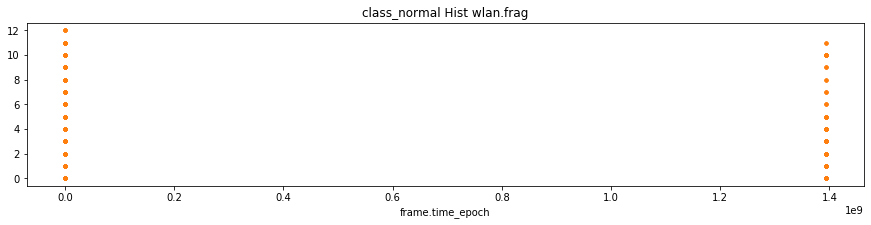

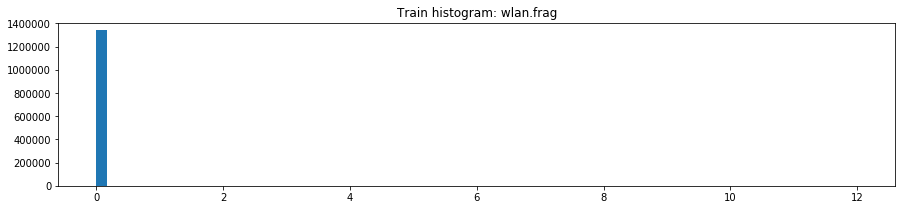

,wlan.frag,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.340185e+06,1.177800e+06,162385.000000,389444.000000,346544.000000,42900.000000
1,mean,2.164627e-03,0.000000e+00,0.017865,0.107343,0.054700,0.532587
2,std,1.176390e-01,0.000000e+00,0.337542,0.561340,0.398903,1.171284
3,min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
5,50%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
6,75%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000
7,max,1.200000e+01,0.000000e+00,12.000000,11.000000,3.000000,11.000000
8,unique values,1.400000e+01,2.000000e+00,13.000000,13.000000,4.000000,13.000000
9,NaNs,4.553890e+05,4.553890e+05,0.000000,186198.000000,184240.000000,1958.000000


,wlan.frag,Count in train (desc),Mean target train,Sum target train
0,0.0,1339522,0.879269,1177800
1,3.0,113,0.000000,0
2,2.0,106,0.000000,0
3,1.0,104,0.000000,0
4,4.0,102,0.000000,0
5,5.0,62,0.000000,0
6,10.0,31,0.000000,0
7,8.0,30,0.000000,0
8,7.0,29,0.000000,0
9,9.0,27,0.000000,0


,wlan.frag,Count in test (desc),Mean target test,Sum target test
0,0.0,369961,0.919005,339996
1,1.0,6613,0.052019,344
2,3.0,6229,0.995987,6204
3,2.0,6206,0.000000,0
4,10.0,374,0.000000,0
5,4.0,24,0.000000,0
6,5.0,14,0.000000,0
7,6.0,5,0.000000,0
8,7.0,5,0.000000,0
9,9.0,5,0.000000,0


,Column,Correlation with wlan.frag
0,wlan.frag,1.000000
1,class_injection,0.081252
2,wlan.duration,0.031416
3,radiotap.dbm_antsignal,0.008471
4,wlan.seq,0.006686
5,radiotap.channel.freq,-0.000166
12,frame.len,-0.013872
13,radiotap.datarate,-0.019852
14,data.len,-0.026066
15,wlan.fc.subtype,-0.033891


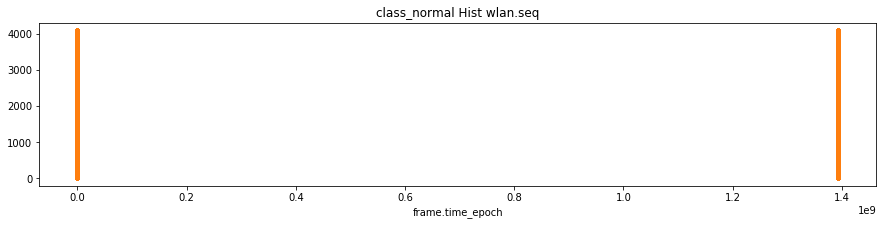

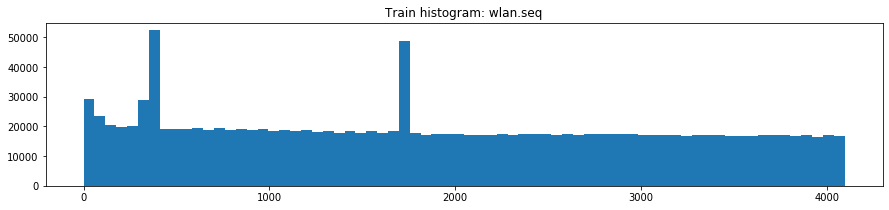

,wlan.seq,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.340185e+06,1.177800e+06,162385.000000,389444.000000,346544.000000,42900.000000
1,mean,1.910166e+03,1.989683e+03,1333.419595,1860.775922,1928.021042,1317.573287
2,std,1.200124e+03,1.191980e+03,1096.866562,1174.323522,1183.894674,930.125428
3,min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,25%,8.400000e+02,9.470000e+02,359.000000,891.000000,906.000000,703.000000
5,50%,1.811000e+03,1.963000e+03,1220.000000,1702.000000,1856.000000,1293.000000
6,75%,2.940000e+03,3.019000e+03,1703.000000,2845.000000,2935.000000,1293.000000
7,max,4.095000e+03,4.095000e+03,4095.000000,4095.000000,4095.000000,4095.000000
8,unique values,4.097000e+03,4.097000e+03,4096.000000,4097.000000,4097.000000,4089.000000
9,NaNs,4.553890e+05,4.553890e+05,0.000000,186198.000000,184240.000000,1958.000000


,wlan.seq,Count in train (desc),Mean target train,Sum target train
0,1703.0,31511,0.009901,312
1,345.0,9404,0.029668,279
2,355.0,8988,0.034490,310
3,359.0,8818,0.035042,309
4,364.0,8451,0.036682,310
5,368.0,7927,0.040621,322
6,0.0,6212,0.142627,886
7,76.0,3146,0.098538,310
8,1.0,560,0.930357,521
9,2.0,488,0.928279,453


,wlan.seq,Count in test (desc),Mean target test,Sum target test
0,1293.0,25583,0.272603,6974
1,0.0,1260,0.501587,632
2,1703.0,562,0.147687,83
3,10.0,526,0.245247,129
4,1.0,177,0.847458,150
5,12.0,176,0.812500,143
6,4.0,175,0.800000,140
7,3.0,174,0.821839,143
8,2.0,173,0.843931,146
9,9.0,165,0.824242,136


,Column,Correlation with wlan.seq
0,wlan.seq,1.000000
1,class_normal,0.178442
2,data.len,0.099621
3,wlan.fc.subtype,0.085297
4,radiotap.datarate,0.070914
5,frame.len,0.066517
20,frame.time_relative,-0.042267
21,frame.time_epoch,-0.042267
22,radiotap.mactime,-0.042464
23,class_flooding,-0.084081


,wlan.bar.type,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,0.0,0.0,0.0
1,unique values,2,2,1,1.0,1.0,1.0
2,NaNs,0,0,0,575642.0,530784.0,44858.0
3,NaNs share,0,0,0,1.0,1.0,1.0


,wlan.bar.type,Count in train (desc),Mean target train,Sum target train
0,Rare,1795551,0.909563,1633166
1,0x02,23,1.000000,23


,wlan.bar.type,Count in test (desc),Mean target test,Sum target test


,wlan.ba.control.ackpolicy,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,0.0,0.0,0.0
1,unique values,3,3,1,1.0,1.0,1.0
2,NaNs,0,0,0,575642.0,530784.0,44858.0
3,NaNs share,0,0,0,1.0,1.0,1.0


,wlan.ba.control.ackpolicy,Count in train (desc),Mean target train,Sum target train
0,Rare,1795473,0.909559,1633088
1,1,76,1.000000,76
2,0,25,1.000000,25


,wlan.ba.control.ackpolicy,Count in test (desc),Mean target test,Sum target test


,wlan.ba.control.multitid,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,0.0,0.0,0.0
1,unique values,2,2,1,1.0,1.0,1.0
2,NaNs,0,0,0,575642.0,530784.0,44858.0
3,NaNs share,0,0,0,1.0,1.0,1.0


,wlan.ba.control.multitid,Count in train (desc),Mean target train,Sum target train
0,Rare,1795473,0.909559,1633088
1,0,101,1.000000,101


,wlan.ba.control.multitid,Count in test (desc),Mean target test,Sum target test


,wlan.ba.bm,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,0.0,0.0,0.0
1,unique values,33,33,1,1.0,1.0,1.0
2,NaNs,0,0,0,575642.0,530784.0,44858.0
3,NaNs share,0,0,0,1.0,1.0,1.0


,wlan.ba.bm,Count in train (desc),Mean target train,Sum target train
0,Rare,1795496,0.90956,1633111
1,00:00:00:00:00:00:00:00,33,1.00000,33
2,ff:ff:1f:00:00:00:00:00,3,1.00000,3
3,ff:ff:0f:00:00:00:00:00,3,1.00000,3
4,ff:ff:07:00:00:00:00:00,2,1.00000,2
5,ff:7f:00:00:00:00:00:00,2,1.00000,2
6,ff:3f:00:00:00:00:00:00,2,1.00000,2
7,ff:00:00:00:00:00:00:00,2,1.00000,2
8,ff:ff:00:00:00:00:00:00,2,1.00000,2
9,7f:00:00:00:00:00:00:00,2,1.00000,2


,wlan.ba.bm,Count in test (desc),Mean target test,Sum target test


,wlan_mgt.fixed.capabilities.ess,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,60072.0000,58005.0000,2067.0000
1,unique values,3,2,3,2.0000,2.0000,2.0000
2,NaNs,0,0,0,515570.0000,472779.0000,42791.0000
3,NaNs share,0,0,0,0.8956,0.8907,0.9539


,wlan_mgt.fixed.capabilities.ess,Count in train (desc),Mean target train,Sum target train
0,Rare,1614825,0.905783,1462681
1,1,179950,0.947530,170508
2,0,799,0.000000,0


,wlan_mgt.fixed.capabilities.ess,Count in test (desc),Mean target test,Sum target test
0,1.0,60072,0.965591,58005


,wlan_mgt.fixed.capabilities.ibss,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,60072.0000,58005.0000,2067.0000
1,unique values,3,2,3,2.0000,2.0000,2.0000
2,NaNs,0,0,0,515570.0000,472779.0000,42791.0000
3,NaNs share,0,0,0,0.8956,0.8907,0.9539


,wlan_mgt.fixed.capabilities.ibss,Count in train (desc),Mean target train,Sum target train
0,Rare,1614825,0.905783,1462681
1,0,179977,0.947388,170508
2,1,772,0.000000,0


,wlan_mgt.fixed.capabilities.ibss,Count in test (desc),Mean target test,Sum target test
0,0.0,60072,0.965591,58005


,wlan_mgt.fixed.capabilities.cfpoll.ap,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,60072,58005,2067
1,unique,2,2,2,2,2,1
2,top,Rare,Rare,Rare,0x0000,0x0000,0x0000
3,freq,1616314,1462685,153629,60070,58003,2067
4,unique values,2,2,2,3,3,2
5,NaNs,0,0,0,515570,472779,42791
6,NaNs share,0,0,0,0.8956,0.8907,0.9539


,wlan_mgt.fixed.capabilities.cfpoll.ap,Count in train (desc),Mean target train,Sum target train
0,Rare,1616314,0.904951,1462685
1,0x0000,179260,0.951155,170504


,wlan_mgt.fixed.capabilities.cfpoll.ap,Count in test (desc),Mean target test,Sum target test
0,0x0000,60070,0.96559,58003
1,0x0080,2,1.00000,2


,wlan_mgt.fixed.capabilities.privacy,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,60072.0000,58005.0000,2067.0000
1,unique values,3,3,3,3.0000,3.0000,2.0000
2,NaNs,0,0,0,515570.0000,472779.0000,42791.0000
3,NaNs share,0,0,0,0.8956,0.8907,0.9539


,wlan_mgt.fixed.capabilities.privacy,Count in train (desc),Mean target train,Sum target train
0,Rare,1614825,0.905783,1462681
1,1,122401,0.951765,116497
2,0,58348,0.925670,54011


,wlan_mgt.fixed.capabilities.privacy,Count in test (desc),Mean target test,Sum target test
0,1.0,49667,0.958383,47600
1,0.0,10405,1.000000,10405


,wlan_mgt.fixed.capabilities.preamble,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,60072.0000,58005.0000,2067.0000
1,unique values,3,3,3,3.0000,3.0000,3.0000
2,NaNs,0,0,0,515570.0000,472779.0000,42791.0000
3,NaNs share,0,0,0,0.8956,0.8907,0.9539


,wlan_mgt.fixed.capabilities.preamble,Count in train (desc),Mean target train,Sum target train
0,Rare,1614825,0.905783,1462681
1,1,99252,0.991819,98440
2,0,81497,0.884302,72068


,wlan_mgt.fixed.capabilities.preamble,Count in test (desc),Mean target test,Sum target test
0,0.0,30093,0.931346,28027
1,1.0,29979,0.999967,29978


,wlan_mgt.fixed.capabilities.pbcc,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,60072.0000,58005.0000,2067.0000
1,unique values,3,3,3,3.0000,3.0000,2.0000
2,NaNs,0,0,0,515570.0000,472779.0000,42791.0000
3,NaNs share,0,0,0,0.8956,0.8907,0.9539


,wlan_mgt.fixed.capabilities.pbcc,Count in train (desc),Mean target train,Sum target train
0,Rare,1614825,0.905783,1462681
1,0,179975,0.947393,170507
2,1,774,0.001292,1


,wlan_mgt.fixed.capabilities.pbcc,Count in test (desc),Mean target test,Sum target test
0,0.0,60064,0.965587,57997
1,1.0,8,1.000000,8


,wlan_mgt.fixed.capabilities.agility,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,60072.0000,58005.0000,2067.0000
1,unique values,3,2,3,2.0000,2.0000,2.0000
2,NaNs,0,0,0,515570.0000,472779.0000,42791.0000
3,NaNs share,0,0,0,0.8956,0.8907,0.9539


,wlan_mgt.fixed.capabilities.agility,Count in train (desc),Mean target train,Sum target train
0,Rare,1614825,0.905783,1462681
1,0,179958,0.947488,170508
2,1,791,0.000000,0


,wlan_mgt.fixed.capabilities.agility,Count in test (desc),Mean target test,Sum target test
0,0.0,60072,0.965591,58005


,wlan_mgt.fixed.capabilities.spec_man,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,60072.0000,58005.0000,2067.0000
1,unique values,3,3,3,2.0000,2.0000,2.0000
2,NaNs,0,0,0,515570.0000,472779.0000,42791.0000
3,NaNs share,0,0,0,0.8956,0.8907,0.9539


,wlan_mgt.fixed.capabilities.spec_man,Count in train (desc),Mean target train,Sum target train
0,Rare,1614825,0.905783,1462681
1,0,179941,0.947366,170470
2,1,808,0.047030,38


,wlan_mgt.fixed.capabilities.spec_man,Count in test (desc),Mean target test,Sum target test
0,0.0,60072,0.965591,58005


,wlan_mgt.fixed.capabilities.short_slot_time,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,60072.0000,58005.0000,2067.0000
1,unique values,3,3,3,3.0000,3.0000,3.0000
2,NaNs,0,0,0,515570.0000,472779.0000,42791.0000
3,NaNs share,0,0,0,0.8956,0.8907,0.9539


,wlan_mgt.fixed.capabilities.short_slot_time,Count in train (desc),Mean target train,Sum target train
0,Rare,1614825,0.905783,1462681
1,1,173945,0.955980,166288
2,0,6804,0.620223,4220


,wlan_mgt.fixed.capabilities.short_slot_time,Count in test (desc),Mean target test,Sum target test
0,1.0,57684,0.974551,56216
1,0.0,2388,0.749162,1789


,wlan_mgt.fixed.capabilities.apsd,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,60072.0000,58005.0000,2067.0000
1,unique values,3,3,3,3.0000,3.0000,2.0000
2,NaNs,0,0,0,515570.0000,472779.0000,42791.0000
3,NaNs share,0,0,0,0.8956,0.8907,0.9539


,wlan_mgt.fixed.capabilities.apsd,Count in train (desc),Mean target train,Sum target train
0,Rare,1614825,0.905783,1462681
1,0,179938,0.947571,170504
2,1,811,0.004932,4


,wlan_mgt.fixed.capabilities.apsd,Count in test (desc),Mean target test,Sum target test
0,0.0,60070,0.96559,58003
1,1.0,2,1.00000,2


,wlan_mgt.fixed.capabilities.radio_measurement,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,60072.0000,58005.0000,2067.0000
1,unique values,3,3,3,2.0000,2.0000,2.0000
2,NaNs,0,0,0,515570.0000,472779.0000,42791.0000
3,NaNs share,0,0,0,0.8956,0.8907,0.9539


,wlan_mgt.fixed.capabilities.radio_measurement,Count in train (desc),Mean target train,Sum target train
0,Rare,1614825,0.905783,1462681
1,0,179944,0.947556,170507
2,1,805,0.001242,1


,wlan_mgt.fixed.capabilities.radio_measurement,Count in test (desc),Mean target test,Sum target test
0,0.0,60072,0.965591,58005


,wlan_mgt.fixed.capabilities.dsss_ofdm,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,60072.0000,58005.0000,2067.0000
1,unique values,3,2,3,2.0000,2.0000,2.0000
2,NaNs,0,0,0,515570.0000,472779.0000,42791.0000
3,NaNs share,0,0,0,0.8956,0.8907,0.9539


,wlan_mgt.fixed.capabilities.dsss_ofdm,Count in train (desc),Mean target train,Sum target train
0,Rare,1614825,0.905783,1462681
1,0,179977,0.947388,170508
2,1,772,0.000000,0


,wlan_mgt.fixed.capabilities.dsss_ofdm,Count in test (desc),Mean target test,Sum target test
0,0.0,60072,0.965591,58005


,wlan_mgt.fixed.capabilities.del_blk_ack,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,60072.0000,58005.0000,2067.0000
1,unique values,3,2,3,2.0000,2.0000,2.0000
2,NaNs,0,0,0,515570.0000,472779.0000,42791.0000
3,NaNs share,0,0,0,0.8956,0.8907,0.9539


,wlan_mgt.fixed.capabilities.del_blk_ack,Count in train (desc),Mean target train,Sum target train
0,Rare,1614825,0.905783,1462681
1,0,179973,0.947409,170508
2,1,776,0.000000,0


,wlan_mgt.fixed.capabilities.del_blk_ack,Count in test (desc),Mean target test,Sum target test
0,0.0,60072,0.965591,58005


,wlan_mgt.fixed.capabilities.imm_blk_ack,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,60072.0000,58005.0000,2067.0000
1,unique values,3,2,3,2.0000,2.0000,2.0000
2,NaNs,0,0,0,515570.0000,472779.0000,42791.0000
3,NaNs share,0,0,0,0.8956,0.8907,0.9539


,wlan_mgt.fixed.capabilities.imm_blk_ack,Count in train (desc),Mean target train,Sum target train
0,Rare,1614825,0.905783,1462681
1,0,179978,0.947382,170508
2,1,771,0.000000,0


,wlan_mgt.fixed.capabilities.imm_blk_ack,Count in test (desc),Mean target test,Sum target test
0,0.0,60072,0.965591,58005


,wlan_mgt.fixed.listen_ival,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,72,72,0
1,unique,5,5,2,5,5,0
2,top,Rare,Rare,Rare,0x000a,0x000a,NaN
3,freq,1780005,1620753,159252,41,41,NaN
4,unique values,5,5,2,6,6,1
5,NaNs,0,0,0,575570,530712,44858
6,NaNs share,0,0,0,0.9999,0.9999,1


,wlan_mgt.fixed.listen_ival,Count in train (desc),Mean target train,Sum target train
0,Rare,1780005,0.910533,1620753
1,0x0064,11992,1.000000,11992
2,0x000a,3495,0.103577,362
3,0x0005,56,1.000000,56
4,0x0001,26,1.000000,26


,wlan_mgt.fixed.listen_ival,Count in test (desc),Mean target test,Sum target test
0,0x000a,41,1,41
1,0x0005,14,1,14
2,0x0001,9,1,9
3,0x0064,6,1,6
4,0x0003,2,1,2


,wlan_mgt.fixed.current_ap,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,23,23,0
1,unique,5,5,1,2,2,0
2,top,Rare,Rare,Rare,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,NaN
3,freq,1795483,1633098,162385,17,17,NaN
4,unique values,5,5,1,3,3,1
5,NaNs,0,0,0,575619,530761,44858
6,NaNs share,0,0,0,1,1,1


,wlan_mgt.fixed.current_ap,Count in train (desc),Mean target train,Sum target train
0,Rare,1795483,0.909559,1633098
1,28:c6:8e:86:d3:d6,47,1.000000,47
2,38:22:9d:ae:c5:65,35,1.000000,35
3,b0:48:7a:e2:62:23,7,1.000000,7
4,00:13:33:87:62:6d,2,1.000000,2


,wlan_mgt.fixed.current_ap,Count in test (desc),Mean target test,Sum target test
0,28:c6:8e:86:d3:d6,17,1,17
1,38:22:9d:ae:c5:65,6,1,6


,wlan_mgt.fixed.status_code,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,346,340,6
1,unique,3,3,3,3,3,1
2,top,Rare,Rare,Rare,0x0000,0x0000,0x0000
3,freq,1766628,1604664,161964,332,326,6
4,unique values,3,3,3,4,4,2
5,NaNs,0,0,0,575296,530444,44852
6,NaNs share,0,0,0,0.9994,0.9994,0.9999


,wlan_mgt.fixed.status_code,Count in train (desc),Mean target train,Sum target train
0,Rare,1766628,0.908320,1604664
1,0x0000,26543,0.984177,26123
2,0x000d,2403,0.999584,2402


,wlan_mgt.fixed.status_code,Count in test (desc),Mean target test,Sum target test
0,0x0000,332,0.981928,326
1,0x000d,13,1.000000,13
2,0x000f,1,1.000000,1


,wlan_mgt.fixed.timestamp,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,59909,57843,2066
1,unique,2,2,2,57259,57259,1
2,top,Rare,Rare,Rare,0x0000000000000000,0x000000000018fd80,0x0000000000000000
3,freq,1788478,1633187,155291,2068,3,2066
4,unique values,2,2,2,57260,57260,2
5,NaNs,0,0,0,515733,472941,42792
6,NaNs share,0,0,0,0.8959,0.891,0.9539


,wlan_mgt.fixed.timestamp,Count in train (desc),Mean target train,Sum target train
0,Rare,1788478,0.913171,1633187
1,0x0000000000000000,7096,0.000282,2


,wlan_mgt.fixed.timestamp,Count in test (desc),Mean target test,Sum target test
0,0x0000000000000000,2068,0.000967,2
1,0x000000000015fd80,3,1.000000,3
2,0x000000000007ed80,3,1.000000,3
3,0x0000000000177d80,3,1.000000,3
4,0x000000000018fd80,3,1.000000,3
5,0x00000000000e1d80,3,1.000000,3
6,0x0000000034d37d80,2,1.000000,2
7,0x0000000031cf8d80,2,1.000000,2
8,0x000000002b52ad80,2,1.000000,2
9,0x000000400e0c0184,2,1.000000,2


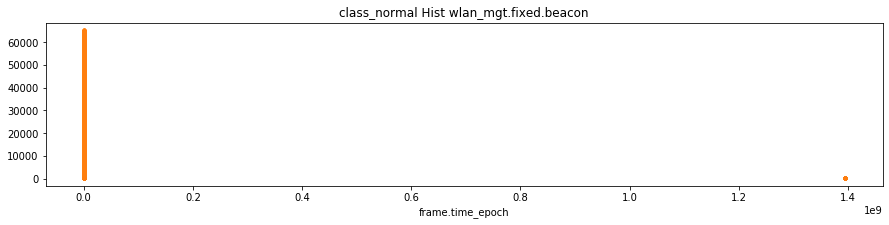

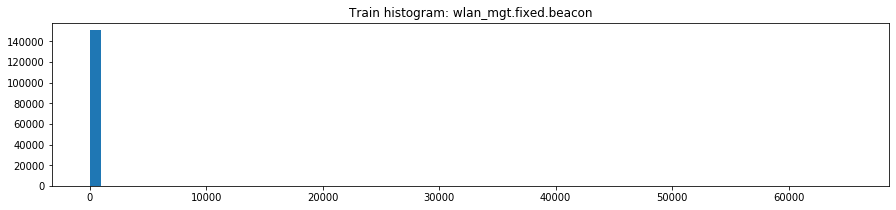

,wlan_mgt.fixed.beacon,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.520920e+05,1.449980e+05,7094.000000,59909.0000,57843.000,2066.0000
1,mean,4.351534e+02,1.000000e+02,7285.530166,100.0000,100.000,100.0000
2,std,3.802136e+03,0.000000e+00,16147.630986,0.0000,0.000,0.0000
3,min,2.000000e+01,1.000000e+02,20.000000,100.0000,100.000,100.0000
4,25%,1.000000e+02,1.000000e+02,100.000000,100.0000,100.000,100.0000
5,50%,1.000000e+02,1.000000e+02,100.000000,100.0000,100.000,100.0000
6,75%,1.000000e+02,1.000000e+02,100.000000,100.0000,100.000,100.0000
7,max,6.535700e+04,1.000000e+02,65357.000000,100.0000,100.000,100.0000
8,unique values,1.546000e+03,2.000000e+00,1546.000000,2.0000,2.000,2.0000
9,NaNs,1.643482e+06,1.488191e+06,155291.000000,515733.0000,472941.000,42792.0000


,wlan_mgt.fixed.beacon,Count in train (desc),Mean target train,Sum target train
0,100.0,150534,0.963224,144998
1,48568.0,2,0.000000,0
2,64941.0,2,0.000000,0
3,23198.0,2,0.000000,0
4,23674.0,2,0.000000,0
5,46320.0,2,0.000000,0
6,1672.0,2,0.000000,0
7,1174.0,2,0.000000,0
8,20097.0,2,0.000000,0
9,53553.0,2,0.000000,0


,wlan_mgt.fixed.beacon,Count in test (desc),Mean target test,Sum target test
0,100.0,59909,0.965514,57843


,Column,Correlation with wlan_mgt.fixed.beacon
0,wlan_mgt.fixed.beacon,1.000000
1,wlan_mgt.tim.dtim_count,0.826812
2,wlan_mgt.rsn.pcs.count,0.755125
3,wlan_mgt.tim.dtim_period,0.742648
4,wlan_mgt.rsn.gcs.type,0.738073
5,wlan_mgt.rsn.akms.count,0.729363
17,radiotap.datarate,-0.002411
18,class_impersonation,-0.013990
19,frame.time_delta,-0.038119
20,wlan.fc.subtype,-0.232762


,wlan_mgt.fixed.aid,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,91,90,1
1,unique,5,5,2,6,6,1
2,top,Rare,Rare,Rare,0x0001,0x0001,0x0001
3,freq,1782509,1620138,162371,59,58,1
4,unique values,5,5,2,7,7,2
5,NaNs,0,0,0,575551,530694,44857
6,NaNs share,0,0,0,0.9998,0.9998,1


,wlan_mgt.fixed.aid,Count in train (desc),Mean target train,Sum target train
0,Rare,1782509,0.908909,1620138
1,0x0001,12981,0.998922,12967
2,0x0003,36,1.000000,36
3,0x0004,24,1.000000,24
4,0x0005,24,1.000000,24


,wlan_mgt.fixed.aid,Count in test (desc),Mean target test,Sum target test
0,0x0001,59,0.983051,58
1,0x0002,13,1.000000,13
2,0x0004,7,1.000000,7
3,0x0005,6,1.000000,6
4,0x0003,5,1.000000,5
5,0x0006,1,1.000000,1


,wlan_mgt.fixed.reason_code,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,6289,1283,5006
1,unique,4,4,3,6,5,3
2,top,Rare,Rare,Rare,0x0007,0x0007,0x0007
3,freq,1573943,1453185,120758,5668,1223,4445
4,unique values,4,4,3,7,6,4
5,NaNs,0,0,0,569353,529501,39852
6,NaNs share,0,0,0,0.9891,0.9976,0.8884


,wlan_mgt.fixed.reason_code,Count in train (desc),Mean target train,Sum target train
0,Rare,1573943,0.923277,1453185
1,0x0007,172849,0.939560,162402
2,0x0001,31235,0.001761,55
3,0x0006,17547,1.000000,17547


,wlan_mgt.fixed.reason_code,Count in test (desc),Mean target test,Sum target test
0,0x0007,5668,0.215773,1223
1,0x0001,481,0.008316,4
2,0x0008,84,0.000000,0
3,0x0006,39,1.000000,39
4,0x0003,14,1.000000,14
5,0x0002,3,1.000000,3


,wlan_mgt.fixed.auth.alg,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,255.0000,250.0000,5.0000
1,unique values,3,3,3,3.0000,3.0000,2.0000
2,NaNs,0,0,0,575387.0000,530534.0000,44853.0000
3,NaNs share,0,0,0,0.9996,0.9995,0.9999


,wlan_mgt.fixed.auth.alg,Count in train (desc),Mean target train,Sum target train
0,Rare,1779713,0.908986,1617735
1,0,15414,0.975412,15035
2,1,447,0.937360,419


,wlan_mgt.fixed.auth.alg,Count in test (desc),Mean target test,Sum target test
0,1.0,136,0.963235,131
1,0.0,119,1.000000,119


,wlan_mgt.fixed.auth_seq,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,255,250,5
1,unique,4,4,4,3,3,2
2,top,Rare,Rare,Rare,0x0002,0x0002,0x0004
3,freq,1779713,1617735,161978,110,108,3
4,unique values,4,4,4,4,4,3
5,NaNs,0,0,0,575387,530534,44853
6,NaNs share,0,0,0,0.9996,0.9995,0.9999


,wlan_mgt.fixed.auth_seq,Count in train (desc),Mean target train,Sum target train
0,Rare,1779713,0.908986,1617735
1,0x0002,9028,0.996677,8998
2,0x0001,6677,0.945035,6310
3,0x0004,156,0.935897,146


,wlan_mgt.fixed.auth_seq,Count in test (desc),Mean target test,Sum target test
0,0x0002,110,0.981818,108
1,0x0001,99,1.000000,99
2,0x0004,46,0.934783,43


,wlan_mgt.fixed.category_code,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,3.0,3.0,0.0
1,unique values,3,3,1,2.0,2.0,1.0
2,NaNs,0,0,0,575639.0,530781.0,44858.0
3,NaNs share,0,0,0,1.0,1.0,1.0


,wlan_mgt.fixed.category_code,Count in train (desc),Mean target train,Sum target train
0,Rare,1795546,0.909562,1633161
1,7,18,1.000000,18
2,3,10,1.000000,10


,wlan_mgt.fixed.category_code,Count in test (desc),Mean target test,Sum target test
0,7.0,3,1,3


,wlan_mgt.fixed.htact,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,3,3,0
1,unique,2,2,1,1,1,0
2,top,Rare,Rare,Rare,0x00,0x00,NaN
3,freq,1795556,1633171,162385,3,3,NaN
4,unique values,2,2,1,2,2,1
5,NaNs,0,0,0,575639,530781,44858
6,NaNs share,0,0,0,1,1,1


,wlan_mgt.fixed.htact,Count in train (desc),Mean target train,Sum target train
0,Rare,1795556,0.909563,1633171
1,0x00,18,1.000000,18


,wlan_mgt.fixed.htact,Count in test (desc),Mean target test,Sum target test
0,0x00,3,1,3


,wlan_mgt.fixed.chanwidth,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,3,3,0
1,unique,3,3,1,2,2,0
2,top,Rare,Rare,Rare,0x01,0x01,NaN
3,freq,1795556,1633171,162385,2,2,NaN
4,unique values,3,3,1,3,3,1
5,NaNs,0,0,0,575639,530781,44858
6,NaNs share,0,0,0,1,1,1


,wlan_mgt.fixed.chanwidth,Count in train (desc),Mean target train,Sum target train
0,Rare,1795556,0.909563,1633171
1,0x00,9,1.000000,9
2,0x01,9,1.000000,9


,wlan_mgt.fixed.chanwidth,Count in test (desc),Mean target test,Sum target test
0,0x01,2,1,2
1,0x00,1,1,1


,wlan_mgt.fixed.fragment,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,0.0,0.0,0.0
1,unique values,2,2,1,1.0,1.0,1.0
2,NaNs,0,0,0,575642.0,530784.0,44858.0
3,NaNs share,0,0,0,1.0,1.0,1.0


,wlan_mgt.fixed.fragment,Count in train (desc),Mean target train,Sum target train
0,Rare,1795471,0.909559,1633086
1,0,103,1.000000,103


,wlan_mgt.fixed.fragment,Count in test (desc),Mean target test,Sum target test


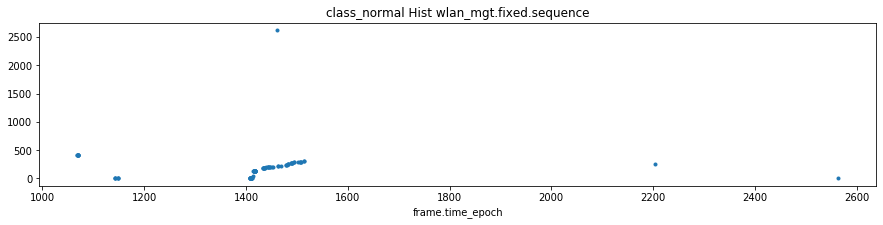

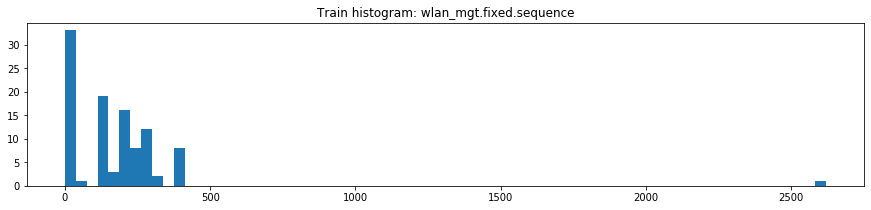

,wlan_mgt.fixed.sequence,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.030000e+02,1.030000e+02,0.0,0.0,0.0,0.0
1,mean,1.786990e+02,1.786990e+02,NaN,NaN,NaN,NaN
2,std,2.736051e+02,2.736051e+02,NaN,NaN,NaN,NaN
3,min,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
4,25%,9.000000e+00,9.000000e+00,NaN,NaN,NaN,NaN
5,50%,1.290000e+02,1.290000e+02,NaN,NaN,NaN,NaN
6,75%,2.535000e+02,2.535000e+02,NaN,NaN,NaN,NaN
7,max,2.620000e+03,2.620000e+03,NaN,NaN,NaN,NaN
8,unique values,4.300000e+01,4.300000e+01,1.0,1.0,1.0,1.0
9,NaNs,1.795471e+06,1.633086e+06,162385.0,575642.0,530784.0,44858.0


,wlan_mgt.fixed.sequence,Count in train (desc),Mean target train,Sum target train
0,9.0,25,1,25
1,129.0,18,1,18
2,409.0,4,1,4
3,408.0,4,1,4
4,191.0,4,1,4
5,199.0,3,1,3
6,3.0,3,1,3
7,2.0,3,1,3
8,0.0,2,1,2
9,221.0,2,1,2


,wlan_mgt.fixed.sequence,Count in test (desc),Mean target test,Sum target test


,Column,Correlation with wlan_mgt.fixed.sequence
0,wlan_mgt.fixed.sequence,1.000000
1,radiotap.channel.freq,0.887801
2,wlan.duration,0.309290
3,frame.time_delta,0.021332
4,frame.time_relative,-0.036035
5,frame.time_epoch,-0.036035
6,radiotap.mactime,-0.036035
7,frame.len,-0.039349
8,wlan.fc.subtype,-0.083783
9,radiotap.datarate,-0.240437


,wlan_mgt.tagged.all,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,62904.0000,60466.0000,2438.0000
1,unique values,2,2,2,2.0000,2.0000,2.0000
2,NaNs,0,0,0,512738.0000,470318.0000,42420.0000
3,NaNs share,0,0,0,0.8907,0.8861,0.9457


,wlan_mgt.tagged.all,Count in train (desc),Mean target train,Sum target train
0,Rare,1605073,0.905230,1452961
1,1,190501,0.946074,180228


,wlan_mgt.tagged.all,Count in test (desc),Mean target test,Sum target test
0,1.0,62904,0.961243,60466


,wlan_mgt.ssid,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,57721,55655,2066
1,unique,9,9,2,235,79,157
2,top,Rare,Rare,Rare,AegeanSecLab,AegeanSecLab,AegeanSecLab
3,freq,1633493,1477978,155515,14990,13523,1467
4,unique values,9,9,2,236,80,158
5,NaNs,0,0,0,517921,475129,42792
6,NaNs share,0,0,0,0.8997,0.8951,0.9539


,wlan_mgt.ssid,Count in train (desc),Mean target train,Sum target train
0,Rare,1633493,0.904796,1477978
1,AegeanSecLab,47782,0.856222,40912
2,pnet,41340,1.000000,41340
3,OTE29224e,28564,1.000000,28564
4,CYTA C565,27158,1.000000,27158
5,CYTA 8D28,16348,1.000000,16348
6,mhxskl140,335,1.000000,335
7,NetFasteR IAD 2 (PSTN),278,1.000000,278
8,OTE CONNX,276,1.000000,276


,wlan_mgt.ssid,Count in test (desc),Mean target test,Sum target test
0,AegeanSecLab,14990,0.902135,13523
1,OTE29224e,10733,1.000000,10733
2,pnet,10431,1.000000,10431
3,CYTA C565,9686,1.000000,9686
4,CYTA 8D28,6929,1.000000,6929
5,conn-x7F395E,1536,1.000000,1536
6,OTE CONNX,920,1.000000,920
7,tsoureas,553,1.000000,553
8,steven,477,1.000000,477
9,NetFasteR IAD 2 (PSTN),253,1.000000,253


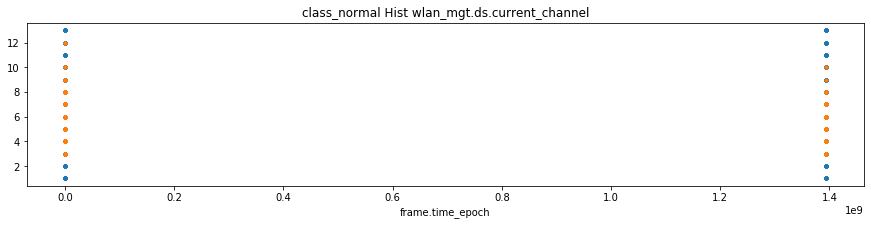

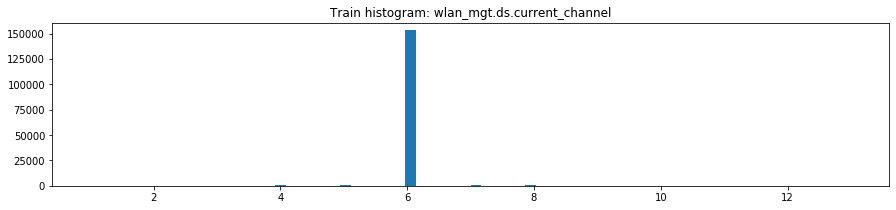

,wlan_mgt.ds.current_channel,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.568510e+05,1.497570e+05,7094.000000,62070.000000,59635.000000,2435.000000
1,mean,6.008741e+00,6.009055e+00,6.002114,6.008023,6.008720,5.990965
2,std,4.563512e-01,4.639558e-01,0.245922,0.441780,0.447114,0.280715
3,min,1.000000e+00,1.000000e+00,3.000000,1.000000,1.000000,3.000000
4,25%,6.000000e+00,6.000000e+00,6.000000,6.000000,6.000000,6.000000
5,50%,6.000000e+00,6.000000e+00,6.000000,6.000000,6.000000,6.000000
6,75%,6.000000e+00,6.000000e+00,6.000000,6.000000,6.000000,6.000000
7,max,1.300000e+01,1.300000e+01,12.000000,13.000000,13.000000,10.000000
8,unique values,1.400000e+01,1.400000e+01,10.000000,14.000000,14.000000,9.000000
9,NaNs,1.638723e+06,1.483432e+06,155291.000000,513572.000000,471149.000000,42423.000000


,wlan_mgt.ds.current_channel,Count in train (desc),Mean target train,Sum target train
0,6.0,153099,0.954167,146082
1,8.0,825,0.980606,809
2,4.0,810,0.979012,793
3,7.0,505,0.982178,496
4,5.0,425,0.960000,408
5,9.0,246,0.983740,242
6,1.0,230,1.000000,230
7,12.0,205,0.985366,202
8,3.0,180,0.961111,173
9,11.0,109,1.000000,109


,wlan_mgt.ds.current_channel,Count in test (desc),Mean target test,Sum target test
0,6.0,60575,0.960627,58190
1,8.0,334,0.985030,329
2,4.0,296,0.962838,285
3,7.0,230,0.947826,218
4,5.0,173,0.930636,161
5,9.0,102,0.990196,101
6,3.0,92,0.923913,85
7,1.0,86,1.000000,86
8,12.0,67,1.000000,67
9,11.0,43,1.000000,43


,Column,Correlation with wlan_mgt.ds.current_channel
0,wlan_mgt.ds.current_channel,1.000000
1,radiotap.channel.freq,0.615228
2,frame.time_delta,0.029162
3,class_normal,0.003160
4,radiotap.mactime,0.001685
5,frame.time_relative,0.000489
17,wlan.seq,-0.009172
18,wlan_mgt.rsn.gcs.type,-0.009852
19,radiotap.dbm_antsignal,-0.019012
20,frame.len,-0.023654


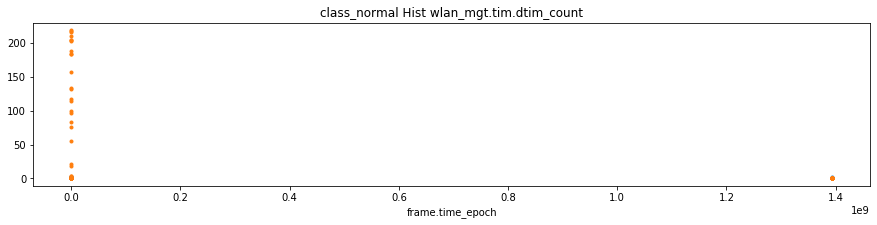

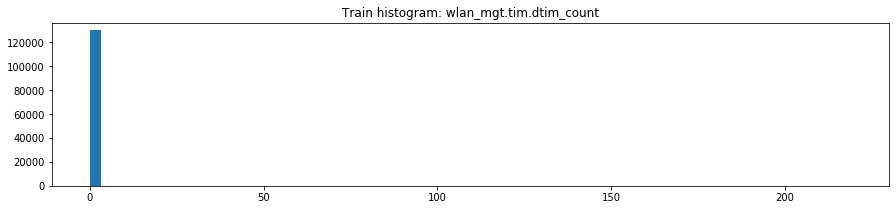

,wlan_mgt.tim.dtim_count,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.298940e+05,1.280710e+05,1823.000000,51691.000000,51092.000000,599.0000
1,mean,1.615933e-01,1.393368e-01,1.725178,0.140063,0.141705,0.0000
2,std,2.061838e+00,3.463891e-01,17.092621,0.347112,0.348807,0.0000
3,min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0000
4,25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0000
5,50%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0000
6,75%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0000
7,max,2.190000e+02,2.000000e+00,219.000000,2.000000,2.000000,0.0000
8,unique values,2.600000e+01,4.000000e+00,24.000000,4.000000,4.000000,2.0000
9,NaNs,1.665680e+06,1.505118e+06,160562.000000,523951.000000,479692.000000,44259.0000


,wlan_mgt.tim.dtim_count,Count in train (desc),Mean target train,Sum target train
0,0.0,112029,0.983942,110230
1,1.0,17837,1.000000,17837
2,2.0,4,1.000000,4
3,3.0,2,0.000000,0
4,184.0,2,0.000000,0
5,134.0,1,0.000000,0
6,218.0,1,0.000000,0
7,217.0,1,0.000000,0
8,210.0,1,0.000000,0
9,205.0,1,0.000000,0


,wlan_mgt.tim.dtim_count,Count in test (desc),Mean target test,Sum target test
0,0.0,44452,0.986525,43853
1,1.0,7238,1.000000,7238
2,2.0,1,1.000000,1


,Column,Correlation with wlan_mgt.tim.dtim_count
0,wlan_mgt.tim.dtim_count,1.000000
1,wlan.duration,0.845448
2,wlan_mgt.fixed.beacon,0.826812
3,wlan_mgt.tim.dtim_period,0.722879
4,class_flooding,0.090477
5,radiotap.dbm_antsignal,0.066781
13,radiotap.channel.freq,-0.000627
14,wlan_mgt.ds.current_channel,-0.000937
15,class_normal,-0.090477
16,wlan_mgt.rsn.pcs.count,-0.814989


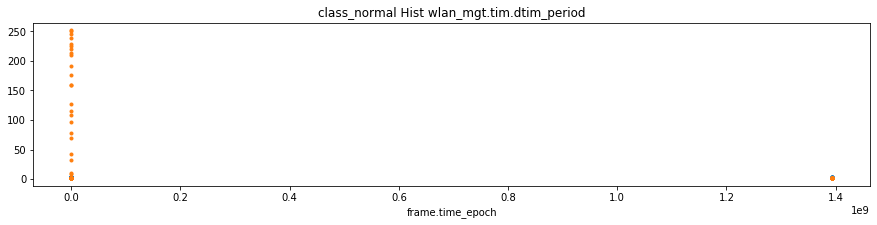

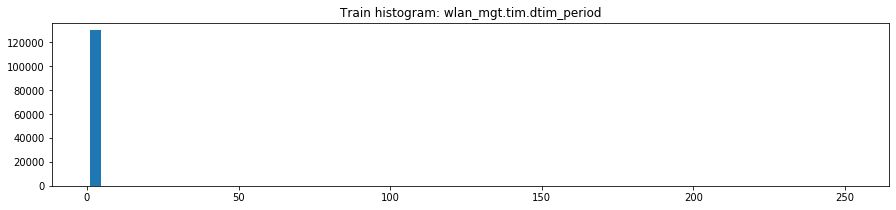

,wlan_mgt.tim.dtim_period,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1.298940e+05,1.280710e+05,1823.000000,51691.000000,51092.000000,599.0000
1,mean,1.289474e+00,1.266750e+00,2.885902,1.260200,1.263251,1.0000
2,std,2.296232e+00,4.424391e-01,18.961835,0.438968,0.440624,0.0000
3,min,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.0000
4,25%,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.0000
5,50%,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.0000
6,75%,2.000000e+00,2.000000e+00,1.000000,2.000000,2.000000,1.0000
7,max,2.520000e+02,3.000000e+00,252.000000,3.000000,3.000000,1.0000
8,unique values,2.700000e+01,4.000000e+00,25.000000,4.000000,4.000000,2.0000
9,NaNs,1.665680e+06,1.505118e+06,160562.000000,523951.000000,479692.000000,44259.0000


,wlan_mgt.tim.dtim_period,Count in train (desc),Mean target train,Sum target train
0,1.0,95718,0.981195,93918
1,2.0,34143,1.000000,34143
2,3.0,10,1.000000,10
3,160.0,1,0.000000,0
4,250.0,1,0.000000,0
5,245.0,1,0.000000,0
6,239.0,1,0.000000,0
7,229.0,1,0.000000,0
8,225.0,1,0.000000,0
9,221.0,1,0.000000,0


,wlan_mgt.tim.dtim_period,Count in test (desc),Mean target test,Sum target test
0,1.0,38246,0.984338,37647
1,2.0,13440,1.000000,13440
2,3.0,5,1.000000,5


,Column,Correlation with wlan_mgt.tim.dtim_period
0,wlan_mgt.tim.dtim_period,1.000000
1,wlan.duration,0.829190
2,wlan_mgt.fixed.beacon,0.742648
3,wlan_mgt.tim.dtim_count,0.722879
4,radiotap.dbm_antsignal,0.112078
5,class_flooding,0.082947
13,radiotap.channel.freq,-0.000658
14,wlan_mgt.ds.current_channel,-0.001364
15,class_normal,-0.082947
16,wlan.fc.subtype,-0.846356


,wlan_mgt.tim.bmapctl.multicast,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,51691.0000,51092.0000,599.0000
1,unique values,3,3,3,3.0000,3.0000,2.0000
2,NaNs,0,0,0,523951.0000,479692.0000,44259.0000
3,NaNs share,0,0,0,0.9102,0.9037,0.9866


,wlan_mgt.tim.bmapctl.multicast,Count in train (desc),Mean target train,Sum target train
0,Rare,1665680,0.903606,1505118
1,0,128107,0.985840,126293
2,1,1787,0.994964,1778


,wlan_mgt.tim.bmapctl.multicast,Count in test (desc),Mean target test,Sum target test
0,0.0,50410,0.988117,49811
1,1.0,1281,1.000000,1281


,wlan_mgt.tim.bmapctl.offset,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,51691,51092,599
1,unique,2,2,2,1,1,1
2,top,Rare,Rare,Rare,0x00,0x00,0x00
3,freq,1665704,1505118,160586,51691,51092,599
4,unique values,2,2,2,2,2,2
5,NaNs,0,0,0,523951,479692,44259
6,NaNs share,0,0,0,0.9102,0.9037,0.9866


,wlan_mgt.tim.bmapctl.offset,Count in train (desc),Mean target train,Sum target train
0,Rare,1665704,0.903593,1505118
1,0x00,129870,0.986148,128071


,wlan_mgt.tim.bmapctl.offset,Count in test (desc),Mean target test,Sum target test
0,0x00,51691,0.988412,51092


,wlan_mgt.country_info.environment,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,5918,5918,0
1,unique,4,4,2,3,3,0
2,top,Rare,Rare,Rare,0x49,0x49,NaN
3,freq,1790631,1628247,162384,3835,3835,NaN
4,unique values,4,4,2,4,4,1
5,NaNs,0,0,0,569724,524866,44858
6,NaNs share,0,0,0,0.9897,0.9889,1


,wlan_mgt.country_info.environment,Count in train (desc),Mean target train,Sum target train
0,Rare,1790631,0.909315,1628247
1,0x49,4564,1.000000,4564
2,0x20,346,1.000000,346
3,0x00,33,0.969697,32


,wlan_mgt.country_info.environment,Count in test (desc),Mean target test,Sum target test
0,0x49,3835,1,3835
1,0x20,2072,1,2072
2,0x00,11,1,11


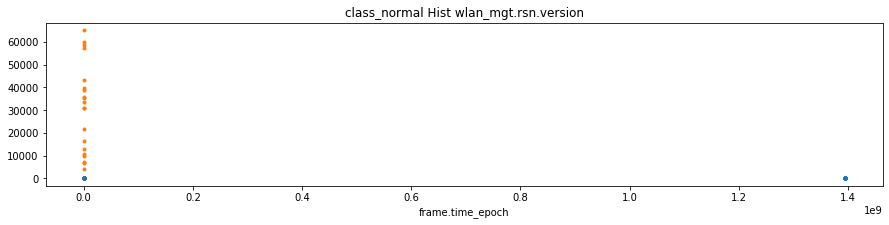

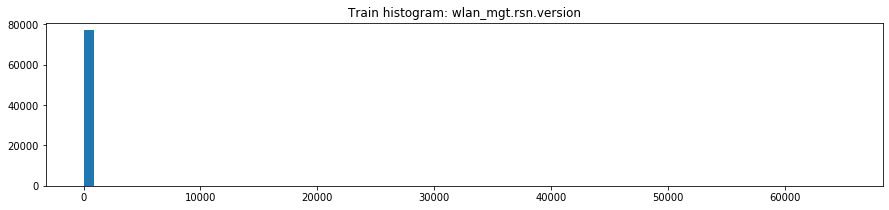

,wlan_mgt.rsn.version,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,7.694400e+04,7.692400e+04,20.000000,33208.0000,33208.0000,0.0
1,mean,9.047788e+00,1.000000e+00,30962.450000,1.0000,1.0000,NaN
2,std,5.849112e+02,0.000000e+00,19407.779982,0.0000,0.0000,NaN
3,min,1.000000e+00,1.000000e+00,4123.000000,1.0000,1.0000,NaN
4,25%,1.000000e+00,1.000000e+00,12244.500000,1.0000,1.0000,NaN
5,50%,1.000000e+00,1.000000e+00,32349.000000,1.0000,1.0000,NaN
6,75%,1.000000e+00,1.000000e+00,40698.750000,1.0000,1.0000,NaN
7,max,6.513800e+04,1.000000e+00,65138.000000,1.0000,1.0000,NaN
8,unique values,2.200000e+01,2.000000e+00,21.000000,2.0000,2.0000,1.0
9,NaNs,1.718630e+06,1.556265e+06,162365.000000,542434.0000,497576.0000,44858.0


,wlan_mgt.rsn.version,Count in train (desc),Mean target train,Sum target train
0,1.0,76924,1,76924
1,33769.0,1,0,0
2,59917.0,1,0,0
3,58602.0,1,0,0
4,57385.0,1,0,0
5,43284.0,1,0,0
6,39837.0,1,0,0
7,38936.0,1,0,0
8,35713.0,1,0,0
9,35191.0,1,0,0


,wlan_mgt.rsn.version,Count in test (desc),Mean target test,Sum target test
0,1.0,33208,1,33208


,Column,Correlation with wlan_mgt.rsn.version
0,wlan_mgt.rsn.version,1.000000
1,class_flooding,0.853307
2,wlan_mgt.rsn.akms.count,0.831186
3,wlan_mgt.rsn.pcs.count,0.830173
4,wlan_mgt.rsn.gcs.type,0.689265
5,wlan_mgt.fixed.beacon,0.678388
13,radiotap.channel.freq,0.000267
14,wlan_mgt.ds.current_channel,0.000184
15,frame.time_delta,-0.004945
16,wlan.fc.subtype,-0.043443


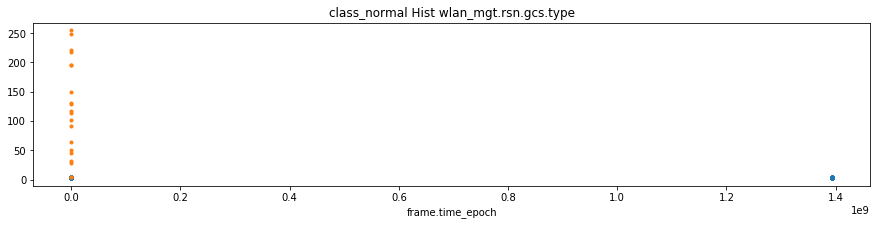

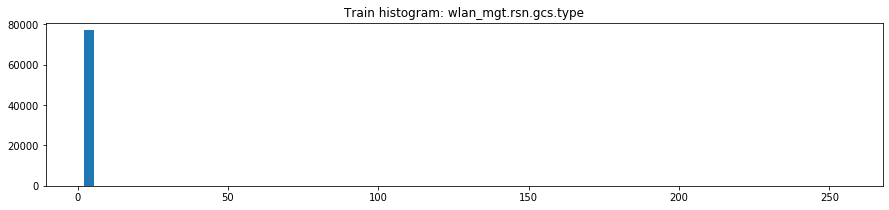

,wlan_mgt.rsn.gcs.type,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,7.694400e+04,7.692400e+04,20.000000,33208.000000,33208.000000,0.0
1,mean,2.032621e+00,2.002028e+00,119.700000,2.000542,2.000542,NaN
2,std,2.286164e+00,6.365447e-02,81.062094,0.032921,0.032921,NaN
3,min,2.000000e+00,2.000000e+00,4.000000,2.000000,2.000000,NaN
4,25%,2.000000e+00,2.000000e+00,49.500000,2.000000,2.000000,NaN
5,50%,2.000000e+00,2.000000e+00,115.500000,2.000000,2.000000,NaN
6,75%,2.000000e+00,2.000000e+00,196.000000,2.000000,2.000000,NaN
7,max,2.550000e+02,4.000000e+00,255.000000,4.000000,4.000000,NaN
8,unique values,2.100000e+01,3.000000e+00,20.000000,3.000000,3.000000,1.0
9,NaNs,1.718630e+06,1.556265e+06,162365.000000,542434.000000,497576.000000,44858.0


,wlan_mgt.rsn.gcs.type,Count in train (desc),Mean target train,Sum target train
0,2.0,76846,1.000000,76846
1,4.0,79,0.987342,78
2,196.0,2,0.000000,0
3,248.0,1,0.000000,0
4,222.0,1,0.000000,0
5,217.0,1,0.000000,0
6,149.0,1,0.000000,0
7,131.0,1,0.000000,0
8,129.0,1,0.000000,0
9,117.0,1,0.000000,0


,wlan_mgt.rsn.gcs.type,Count in test (desc),Mean target test,Sum target test
0,2.0,33199,1,33199
1,4.0,9,1,9


,Column,Correlation with wlan_mgt.rsn.gcs.type
0,wlan_mgt.rsn.gcs.type,1.000000
1,class_flooding,0.829919
2,wlan_mgt.fixed.beacon,0.738073
3,wlan_mgt.rsn.pcs.count,0.702604
4,wlan_mgt.rsn.version,0.689265
5,wlan_mgt.rsn.akms.count,0.686544
15,frame.time_delta,-0.003834
16,radiotap.channel.freq,-0.007806
17,wlan_mgt.ds.current_channel,-0.009852
18,wlan.fc.subtype,-0.043253


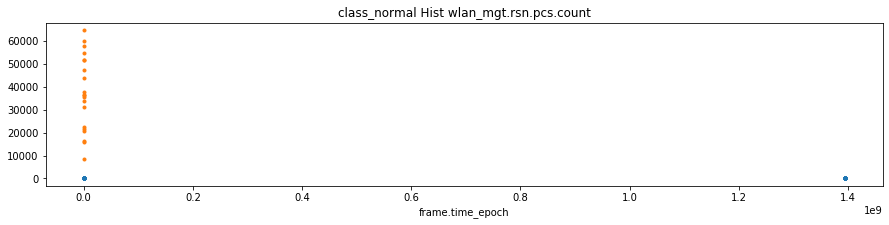

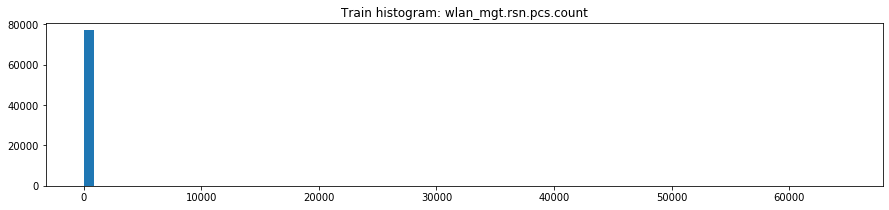

,wlan_mgt.rsn.pcs.count,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,7.694400e+04,7.692400e+04,20.000000,33208.000000,33208.000000,0.0
1,mean,1.167891e+01,1.936951e+00,37481.200000,1.883251,1.883251,NaN
2,std,6.564091e+02,2.430531e-01,16328.929541,0.321126,0.321126,NaN
3,min,1.000000e+00,1.000000e+00,8555.000000,1.000000,1.000000,NaN
4,25%,2.000000e+00,2.000000e+00,22397.000000,2.000000,2.000000,NaN
5,50%,2.000000e+00,2.000000e+00,36548.500000,2.000000,2.000000,NaN
6,75%,2.000000e+00,2.000000e+00,51610.250000,2.000000,2.000000,NaN
7,max,6.470400e+04,2.000000e+00,64704.000000,2.000000,2.000000,NaN
8,unique values,2.300000e+01,3.000000e+00,21.000000,3.000000,3.000000,1.0
9,NaNs,1.718630e+06,1.556265e+06,162365.000000,542434.000000,497576.000000,44858.0


,wlan_mgt.rsn.pcs.count,Count in train (desc),Mean target train,Sum target train
0,2.0,72074,1,72074
1,1.0,4850,1,4850
2,60198.0,1,0,0
3,58030.0,1,0,0
4,54567.0,1,0,0
5,51836.0,1,0,0
6,51535.0,1,0,0
7,47232.0,1,0,0
8,43829.0,1,0,0
9,37942.0,1,0,0


,wlan_mgt.rsn.pcs.count,Count in test (desc),Mean target test,Sum target test
0,2.0,29331,1,29331
1,1.0,3877,1,3877


,Column,Correlation with wlan_mgt.rsn.pcs.count
0,wlan_mgt.rsn.pcs.count,1.000000
1,class_flooding,0.920429
2,wlan_mgt.rsn.akms.count,0.845253
3,wlan_mgt.rsn.version,0.830173
4,wlan_mgt.fixed.beacon,0.755125
5,wlan_mgt.rsn.gcs.type,0.702604
15,frame.time_delta,-0.005229
16,wlan.fc.subtype,-0.046833
17,wlan_mgt.tim.dtim_count,-0.814989
18,class_normal,-0.920429


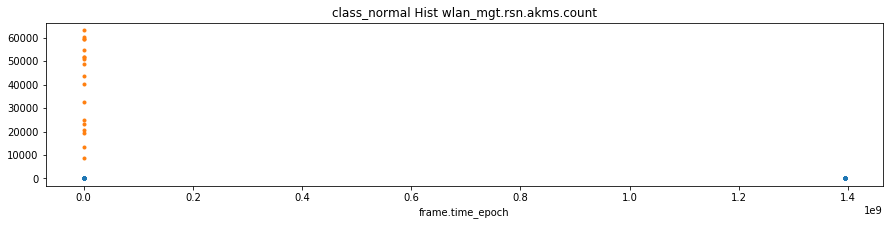

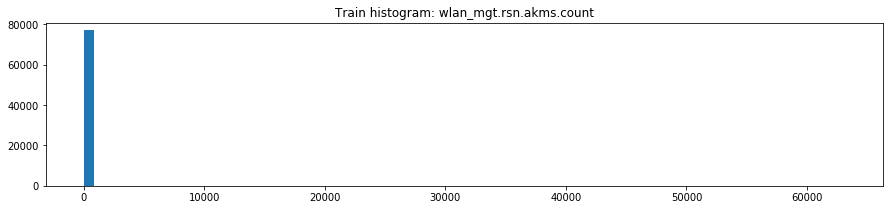

,wlan_mgt.rsn.akms.count,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,7.694200e+04,7.692400e+04,18.000000,33208.0000,33208.0000,0.0
1,mean,1.043910e+01,1.000000e+00,40348.944444,1.0000,1.0000,NaN
2,std,6.718342e+02,0.000000e+00,17875.085749,0.0000,0.0000,NaN
3,min,1.000000e+00,1.000000e+00,8693.000000,1.0000,1.0000,NaN
4,25%,1.000000e+00,1.000000e+00,23592.750000,1.0000,1.0000,NaN
5,50%,1.000000e+00,1.000000e+00,46271.500000,1.0000,1.0000,NaN
6,75%,1.000000e+00,1.000000e+00,54009.750000,1.0000,1.0000,NaN
7,max,6.311100e+04,1.000000e+00,63111.000000,1.0000,1.0000,NaN
8,unique values,2.000000e+01,2.000000e+00,19.000000,2.0000,2.0000,1.0
9,NaNs,1.718632e+06,1.556265e+06,162367.000000,542434.0000,497576.0000,44858.0


,wlan_mgt.rsn.akms.count,Count in train (desc),Mean target train,Sum target train
0,1.0,76924,1,76924
1,48728.0,1,0,0
2,60098.0,1,0,0
3,59389.0,1,0,0
4,59265.0,1,0,0
5,54769.0,1,0,0
6,51732.0,1,0,0
7,51603.0,1,0,0
8,50746.0,1,0,0
9,43815.0,1,0,0


,wlan_mgt.rsn.akms.count,Count in test (desc),Mean target test,Sum target test
0,1.0,33208,1,33208


,Column,Correlation with wlan_mgt.rsn.akms.count
0,wlan_mgt.rsn.akms.count,1.000000
1,class_flooding,0.918472
2,wlan_mgt.rsn.pcs.count,0.845253
3,wlan_mgt.rsn.version,0.831186
4,wlan_mgt.fixed.beacon,0.729363
5,wlan_mgt.rsn.gcs.type,0.686544
13,wlan_mgt.ds.current_channel,0.000188
14,wlan.seq,-0.003149
15,frame.time_delta,-0.005692
16,wlan.fc.subtype,-0.044367


,wlan_mgt.rsn.akms.type,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,33208.0000,33208.0000,0.0
1,unique values,2,2,1,2.0000,2.0000,1.0
2,NaNs,0,0,0,542434.0000,497576.0000,44858.0
3,NaNs share,0,0,0,0.9423,0.9374,1.0


,wlan_mgt.rsn.akms.type,Count in train (desc),Mean target train,Sum target train
0,Rare,1718650,0.905516,1556265
1,2,76924,1.000000,76924


,wlan_mgt.rsn.akms.type,Count in test (desc),Mean target test,Sum target test
0,2.0,33208,1,33208


,wlan_mgt.rsn.capabilities.preauth,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,33208.0000,33208.0000,0.0
1,unique values,2,2,2,3.0000,3.0000,1.0
2,NaNs,0,0,0,542434.0000,497576.0000,44858.0
3,NaNs share,0,0,0,0.9423,0.9374,1.0


,wlan_mgt.rsn.capabilities.preauth,Count in train (desc),Mean target train,Sum target train
0,Rare,1718679,0.905524,1556305
1,0,76895,0.999857,76884


,wlan_mgt.rsn.capabilities.preauth,Count in test (desc),Mean target test,Sum target test
0,0.0,33194,1,33194
1,1.0,14,1,14


,wlan_mgt.rsn.capabilities.no_pairwise,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,33208.0000,33208.0000,0.0
1,unique values,2,2,2,2.0000,2.0000,1.0
2,NaNs,0,0,0,542434.0000,497576.0000,44858.0
3,NaNs share,0,0,0,0.9423,0.9374,1.0


,wlan_mgt.rsn.capabilities.no_pairwise,Count in train (desc),Mean target train,Sum target train
0,Rare,1718641,0.905521,1556265
1,0,76933,0.999883,76924


,wlan_mgt.rsn.capabilities.no_pairwise,Count in test (desc),Mean target test,Sum target test
0,0.0,33208,1,33208


,wlan_mgt.rsn.capabilities.ptksa_replay_counter,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,33208,33208,0
1,unique,2,2,2,3,3,0
2,top,Rare,Rare,Rare,0x0000,0x0000,NaN
3,freq,1718726,1556346,162380,33198,33198,NaN
4,unique values,2,2,2,4,4,1
5,NaNs,0,0,0,542434,497576,44858
6,NaNs share,0,0,0,0.9423,0.9374,1


,wlan_mgt.rsn.capabilities.ptksa_replay_counter,Count in train (desc),Mean target train,Sum target train
0,Rare,1718726,0.905523,1556346
1,0x0000,76848,0.999935,76843


,wlan_mgt.rsn.capabilities.ptksa_replay_counter,Count in test (desc),Mean target test,Sum target test
0,0x0000,33198,1,33198
1,0x0001,9,1,9
2,0x0003,1,1,1


,wlan_mgt.rsn.capabilities.gtksa_replay_counter,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,33208,33208,0
1,unique,2,2,2,1,1,0
2,top,Rare,Rare,Rare,0x0000,0x0000,NaN
3,freq,1718645,1556265,162380,33208,33208,NaN
4,unique values,2,2,2,2,2,1
5,NaNs,0,0,0,542434,497576,44858
6,NaNs share,0,0,0,0.9423,0.9374,1


,wlan_mgt.rsn.capabilities.gtksa_replay_counter,Count in train (desc),Mean target train,Sum target train
0,Rare,1718645,0.905519,1556265
1,0x0000,76929,0.999935,76924


,wlan_mgt.rsn.capabilities.gtksa_replay_counter,Count in test (desc),Mean target test,Sum target test
0,0x0000,33208,1,33208


,wlan_mgt.rsn.capabilities.mfpr,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,33208.0000,33208.0000,0.0
1,unique values,2,2,2,2.0000,2.0000,1.0
2,NaNs,0,0,0,542434.0000,497576.0000,44858.0
3,NaNs share,0,0,0,0.9423,0.9374,1.0


,wlan_mgt.rsn.capabilities.mfpr,Count in train (desc),Mean target train,Sum target train
0,Rare,1718641,0.905521,1556265
1,0,76933,0.999883,76924


,wlan_mgt.rsn.capabilities.mfpr,Count in test (desc),Mean target test,Sum target test
0,0.0,33208,1,33208


,wlan_mgt.rsn.capabilities.mfpc,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,33208.0000,33208.0000,0.0
1,unique values,2,2,2,2.0000,2.0000,1.0
2,NaNs,0,0,0,542434.0000,497576.0000,44858.0
3,NaNs share,0,0,0,0.9423,0.9374,1.0


,wlan_mgt.rsn.capabilities.mfpc,Count in train (desc),Mean target train,Sum target train
0,Rare,1718634,0.905524,1556265
1,0,76940,0.999792,76924


,wlan_mgt.rsn.capabilities.mfpc,Count in test (desc),Mean target test,Sum target test
0,0.0,33208,1,33208


,wlan_mgt.rsn.capabilities.peerkey,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,33208.0000,33208.0000,0.0
1,unique values,2,2,2,2.0000,2.0000,1.0
2,NaNs,0,0,0,542434.0000,497576.0000,44858.0
3,NaNs share,0,0,0,0.9423,0.9374,1.0


,wlan_mgt.rsn.capabilities.peerkey,Count in train (desc),Mean target train,Sum target train
0,Rare,1718641,0.905521,1556265
1,0,76933,0.999883,76924


,wlan_mgt.rsn.capabilities.peerkey,Count in test (desc),Mean target test,Sum target test
0,0.0,33208,1,33208


,wlan_mgt.tcprep.trsmt_pow,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,0.0,0.0,0.0
1,unique values,4,3,2,1.0,1.0,1.0
2,NaNs,0,0,0,575642.0,530784.0,44858.0
3,NaNs share,0,0,0,1.0,1.0,1.0


,wlan_mgt.tcprep.trsmt_pow,Count in train (desc),Mean target train,Sum target train
0,Rare,1795535,0.909562,1633151
1,19,37,1.000000,37
2,-25,1,0.000000,0
3,25,1,1.000000,1


,wlan_mgt.tcprep.trsmt_pow,Count in test (desc),Mean target test,Sum target test


,wlan_mgt.tcprep.link_mrg,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,0.0,0.0,0.0
1,unique values,3,2,2,1.0,1.0,1.0
2,NaNs,0,0,0,575642.0,530784.0,44858.0
3,NaNs share,0,0,0,1.0,1.0,1.0


,wlan_mgt.tcprep.link_mrg,Count in train (desc),Mean target train,Sum target train
0,Rare,1795535,0.909562,1633151
1,0,38,1.000000,38
2,-21,1,0.000000,0


,wlan_mgt.tcprep.link_mrg,Count in test (desc),Mean target test,Sum target test


,wlan.wep.iv,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,227827,205977,21850
1,unique,8,2,8,189800,189796,11
2,top,Rare,Rare,0x28ce93,0x28ce93,0x000053,0x28ce93
3,freq,1686162,1633108,64609,13644,1605,13644
4,unique values,8,2,8,189801,189797,12
5,NaNs,0,0,0,347815,324807,23008
6,NaNs share,0,0,0,0.6042,0.6119,0.5129


,wlan.wep.iv,Count in train (desc),Mean target train,Sum target train
0,Rare,1686162,0.968536,1633108
1,0x28ce93,64690,0.001252,81
2,0x99309a,9097,0.000000,0
3,0x091442,8649,0.000000,0
4,0x536c7e,8479,0.000000,0
5,0x5be630,8114,0.000000,0
6,0x592e2e,7573,0.000000,0
7,0x858ce3,2810,0.000000,0


,wlan.wep.iv,Count in test (desc),Mean target test,Sum target test
0,0x28ce93,13644,0.000000,0
1,0x000053,6342,0.253075,1605
2,0x7a1ce8,2871,0.000000,0
3,0x2604e8,353,0.252125,89
4,0x1b2c8b,331,0.247734,82
5,0x19465a,177,1.000000,177
6,0xe60aed,174,1.000000,174
7,0x9082d4,172,1.000000,172
8,0xa5905a,163,1.000000,163
9,0xd8f8b0,29,0.275862,8


,wlan.wep.key,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385.0,313247.0000,277959.0000,35288.0000
1,unique values,3,3,3.0,5.0000,5.0000,3.0000
2,NaNs,0,0,0.0,262395.0000,252825.0000,9570.0000
3,NaNs share,0,0,0.0,0.4558,0.4763,0.2133


,wlan.wep.key,Count in train (desc),Mean target train,Sum target train
0,Rare,910305,0.942574,858030
1,0,853824,0.871524,744128
2,1,31445,0.986834,31031


,wlan.wep.key,Count in test (desc),Mean target test,Sum target test
0,0.0,292996,0.896118,262559
1,1.0,20055,0.758115,15204
2,2.0,155,1.000000,155
3,3.0,41,1.000000,41


,wlan.wep.icv,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,227827,205977,21850
1,unique,9,2,9,195146,192271,2875
2,top,Rare,Rare,Rare,0xb28f5a7a,0x34bce499,0xb28f5a7a
3,freq,1686166,1633108,53058,13644,86,13644
4,unique values,9,2,9,195147,192272,2876
5,NaNs,0,0,0,347815,324807,23008
6,NaNs share,0,0,0,0.6042,0.6119,0.5129


,wlan.wep.icv,Count in train (desc),Mean target train,Sum target train
0,Rare,1686166,0.968533,1633108
1,0xcc6b80cb,33327,0.002430,81
2,0xb28f5a7a,31363,0.000000,0
3,0x6af2ecfa,9096,0.000000,0
4,0x3389f707,8649,0.000000,0
5,0x165283ab,8478,0.000000,0
6,0x923d9a5f,8114,0.000000,0
7,0x641b6527,7572,0.000000,0
8,0x194565f2,2809,0.000000,0


,wlan.wep.icv,Count in test (desc),Mean target test,Sum target test
0,0xb28f5a7a,13644,0,0
1,0x3b69465c,93,0,0
2,0xca0982a7,92,0,0
3,0x075d2d2f,91,0,0
4,0xa8429a91,91,0,0
5,0x865062ef,91,0,0
6,0xd623b33c,90,0,0
7,0x8070d56a,90,0,0
8,0xc117c7e2,90,0,0
9,0xdc6d836c,90,0,0


,wlan.tkip.extiv,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,14238,14124,114
1,unique,9,1,9,13967,13965,4
2,top,Rare,Rare,Rare,0x0003AAAA48BF,0x000000000011,0x0003AAAA48BF
3,freq,1795202,1633189,162013,60,4,60
4,unique values,9,1,9,13968,13966,5
5,NaNs,0,0,0,561404,516660,44744
6,NaNs share,0,0,0,0.9753,0.9734,0.9975


,wlan.tkip.extiv,Count in train (desc),Mean target train,Sum target train
0,Rare,1795202,0.909752,1633189
1,0x0003AAA991D3,51,0.000000,0
2,0x0003AAA991CF,50,0.000000,0
3,0x0003AAA99485,50,0.000000,0
4,0x0003AAA99489,48,0.000000,0
5,0x0003AAA991DA,44,0.000000,0
6,0x0003AAA991DE,44,0.000000,0
7,0x0003AAA991E2,44,0.000000,0
8,0x0003AAA991E9,41,0.000000,0


,wlan.tkip.extiv,Count in test (desc),Mean target test,Sum target test
0,0x0003AAAA48BF,60,0.000000,0
1,0x0003AAAA48AA,41,0.000000,0
2,0x0000000048BF,8,0.125000,1
3,0x0000000048AA,7,0.142857,1
4,0x000000005500,4,1.000000,4
5,0x000000008700,4,1.000000,4
6,0x000000000011,4,1.000000,4
7,0x000000003200,4,1.000000,4
8,0x0000000080E5,3,1.000000,3
9,0x0000000080F8,3,1.000000,3


,wlan.ccmp.extiv,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,53435,53435,0
1,unique,277,277,1,36831,36831,0
2,top,Rare,Rare,Rare,0x0000000008C3,0x0000000008C3,NaN
3,freq,1793471,1631086,162385,13,13,NaN
4,unique values,277,277,1,36832,36832,1
5,NaNs,0,0,0,522207,477349,44858
6,NaNs share,0,0,0,0.9072,0.8993,1


,wlan.ccmp.extiv,Count in train (desc),Mean target train,Sum target train
0,Rare,1793471,0.909458,1631086
1,0x000000000001,27,1.000000,27
2,0x000000000002,24,1.000000,24
3,0x000000000005,21,1.000000,21
4,0x000000000090,20,1.000000,20
5,0x00000000007F,20,1.000000,20
6,0x000000000067,18,1.000000,18
7,0x000000000003,16,1.000000,16
8,0x000000000004,16,1.000000,16
9,0x000000000092,16,1.000000,16


,wlan.ccmp.extiv,Count in test (desc),Mean target test,Sum target test
0,0x00000000C8E1,13,1,13
1,0x0000000008C3,13,1,13
2,0x000000004029,9,1,9
3,0x000000008783,9,1,9
4,0x0000000000B7,9,1,9
5,0x00000000000E,9,1,9
6,0x00000000554C,8,1,8
7,0x0000000000B6,8,1,8
8,0x000000000284,8,1,8
9,0x000000000001,7,1,7


,wlan.qos.tid,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,187895.0000,187894.000,1.0
1,unique values,3,3,1,5.0000,5.000,2.0
2,NaNs,0,0,0,387747.0000,342890.000,44857.0
3,NaNs share,0,0,0,0.6736,0.646,1.0


,wlan.qos.tid,Count in train (desc),Mean target train,Sum target train
0,Rare,1133371,0.856724,970986
1,1,508521,1.000000,508521
2,0,153682,1.000000,153682


,wlan.qos.tid,Count in test (desc),Mean target test,Sum target test
0,1.0,140015,1.000000,140015
1,0.0,47825,0.999979,47824
2,6.0,42,1.000000,42
3,2.0,13,1.000000,13


,wlan.qos.eosp,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,147320.0000,147320.0000,0.0
1,unique values,2,2,1,2.0000,2.0000,1.0
2,NaNs,0,0,0,428322.0000,383464.0000,44858.0
3,NaNs share,0,0,0,0.7441,0.7224,1.0


,wlan.qos.eosp,Count in train (desc),Mean target train,Sum target train
0,Rare,1279873,0.873124,1117488
1,0,515701,1.000000,515701


,wlan.qos.eosp,Count in test (desc),Mean target test,Sum target test
0,0.0,147320,1,147320


,wlan.qos.ack,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,187895,187894,1
1,unique,2,2,1,2,2,1
2,top,Rare,Rare,Rare,0x0000,0x0000,0x0000
3,freq,1133236,970851,162385,187872,187871,1
4,unique values,2,2,1,3,3,2
5,NaNs,0,0,0,387747,342890,44857
6,NaNs share,0,0,0,0.6736,0.646,1


,wlan.qos.ack,Count in train (desc),Mean target train,Sum target train
0,Rare,1133236,0.856707,970851
1,0x0000,662338,1.000000,662338


,wlan.qos.ack,Count in test (desc),Mean target test,Sum target test
0,0x0000,187872,0.999995,187871
1,0x0001,23,1.000000,23


,wlan.qos.amsdupresent,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,187804.0000,187803.0000,1.0
1,unique values,2,2,1,2.0000,2.0000,2.0
2,NaNs,0,0,0,387838.0000,342981.0000,44857.0
3,NaNs share,0,0,0,0.6737,0.6462,1.0


,wlan.qos.amsdupresent,Count in train (desc),Mean target train,Sum target train
0,Rare,1134225,0.856832,971840
1,0,661349,1.000000,661349


,wlan.qos.amsdupresent,Count in test (desc),Mean target test,Sum target test
0,0.0,187804,0.999995,187803


,wlan.qos.bit4,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,1795574,1633189,162385,40575.0000,40574.0000,1.0
1,unique values,2,2,1,2.0000,2.0000,2.0
2,NaNs,0,0,0,535067.0000,490210.0000,44857.0
3,NaNs share,0,0,0,0.9295,0.9236,1.0


,wlan.qos.bit4,Count in train (desc),Mean target train,Sum target train
0,Rare,1648934,0.901521,1486549
1,0,146640,1.000000,146640


,wlan.qos.bit4,Count in test (desc),Mean target test,Sum target test
0,0.0,40575,0.999975,40574


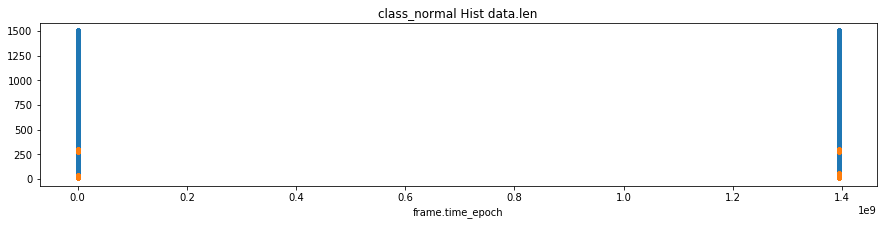

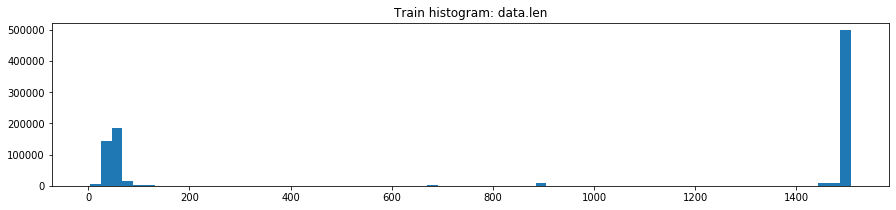

,data.len,Train,Train normal,Train not normal,Test,Test normal,Test not normal
0,count,892554.000000,782444.000000,110110.000000,313775.000000,278487.000000,35288.000000
1,mean,896.970653,1018.013942,36.834466,827.592839,929.826674,20.780492
2,std,700.393956,663.916905,15.549486,713.000403,692.664994,22.921819
3,min,3.000000,3.000000,3.000000,3.000000,10.000000,3.000000
4,25%,60.000000,66.000000,36.000000,60.000000,60.000000,4.000000
5,50%,1488.000000,1488.000000,36.000000,1488.000000,1488.000000,4.000000
6,75%,1490.000000,1490.000000,36.000000,1488.000000,1488.000000,36.000000
7,max,1508.000000,1508.000000,300.000000,1508.000000,1508.000000,300.000000
8,unique values,1309.000000,1309.000000,7.000000,1201.000000,1195.000000,34.000000
9,NaNs,903020.000000,850745.000000,52275.000000,261867.000000,252297.000000,9570.000000


,data.len,Count in train (desc),Mean target train,Sum target train
0,1490.0,258310,1.000000,258310
1,1488.0,238476,1.000000,238476
2,36.0,143482,0.237953,34142
3,60.0,126061,1.000000,126061
4,66.0,30455,1.000000,30455
5,48.0,25472,1.000000,25472
6,1478.0,10118,1.000000,10118
7,1460.0,7509,1.000000,7509
8,896.0,6974,1.000000,6974
9,72.0,5888,1.000000,5888


,data.len,Count in test (desc),Mean target test,Sum target test
0,1488.0,98327,1.000000,98327
1,60.0,33931,0.999941,33929
2,1498.0,30586,1.000000,30586
3,36.0,29408,0.532678,15665
4,1490.0,27916,1.000000,27916
5,4.0,18606,0.000000,0
6,56.0,17423,0.994605,17329
7,66.0,13115,1.000000,13115
8,48.0,6375,0.975843,6221
9,62.0,5125,1.000000,5125


,Column,Correlation with data.len
0,data.len,1.000000
1,frame.len,0.999999
2,radiotap.datarate,0.636754
3,wlan.fc.subtype,0.570980
4,class_normal,0.460693
5,radiotap.dbm_antsignal,0.341172
11,class_impersonation,-0.282357
12,radiotap.mactime,-0.307095
13,frame.time_relative,-0.307095
14,frame.time_epoch,-0.307095


In [32]:
for col in columns:
    proc(df=train, tcol='frame.time_epoch', target='class_normal', col=col, target_first=True, df_test=test, include_test=True)

In [36]:
train.shape

(1795574, 96)